In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [2]:
from yellowbrick.cluster import KElbowVisualizer

In [3]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

# Set option to display long text columns without any line width restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [5]:
# Importing dataset
data = pd.read_csv('C:\Clustering\crime_data.csv')
print(data.shape)
data.head()

(50, 5)


Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [6]:
#Renaming the Unnamed: 0 Column into States
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head(10)

States  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8

In [7]:
data.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
# Missing Values
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns
null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns
null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    5
Name: count, dtype: int64 

Null Percentage for Columns:

 0.0    5
Name: count, dtype: int64


In [10]:
# null count for rows
null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows
null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n", null_count_row, "\n")
print("Null Percentage for Rows:\n", null_percent_row)

Null Count for Rows:
 0    50
Name: count, dtype: int64 

Null Percentage for Rows:
 0.0    50
Name: count, dtype: int64


In [11]:
# Print the duplicated rows
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()

0

In [12]:
data[data.duplicated()]

Empty DataFrame
Columns: [States, Murder, Assault, UrbanPop, Rape]
Index: []

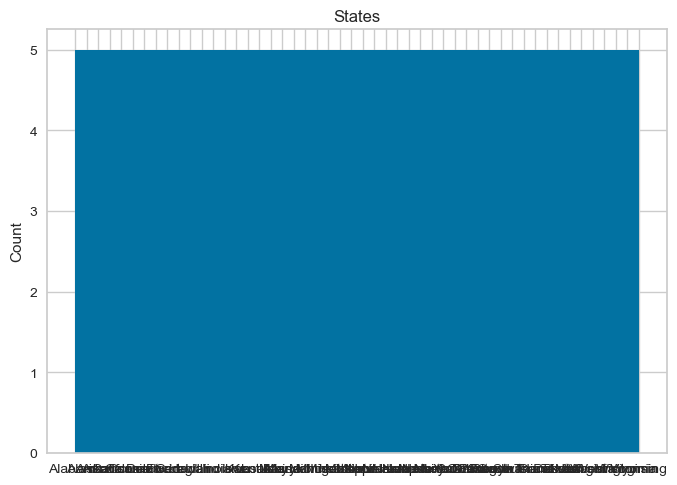

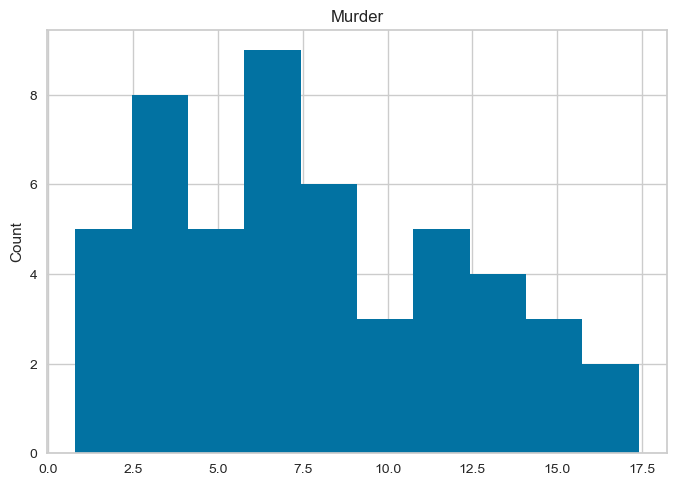

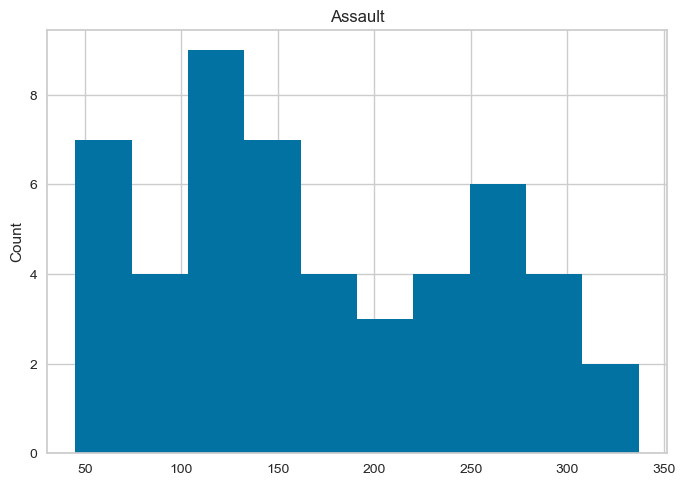

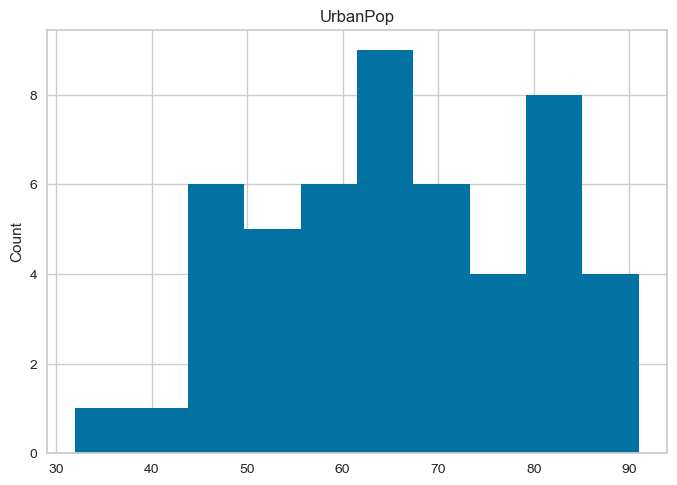

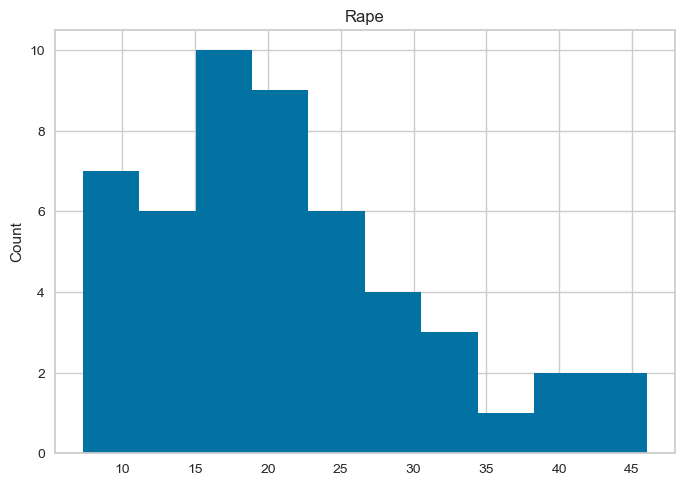

In [13]:
# Lets analyze the features by creating histograms to understand the distribution
for feature in data.columns:
    data= data.copy()
    data[feature].hist(bins= 10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

States


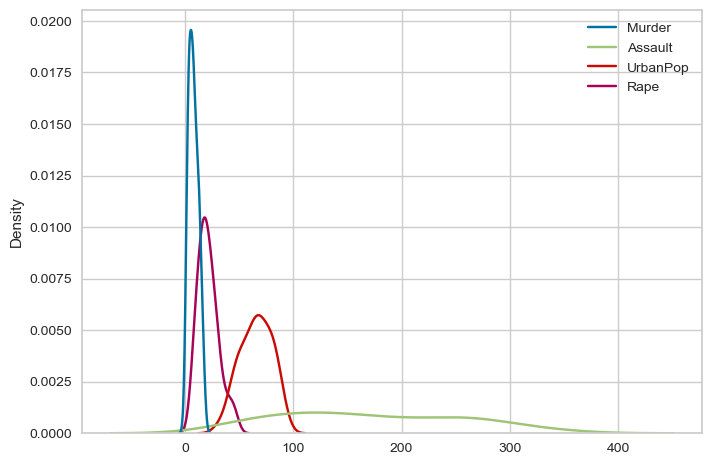

Murder


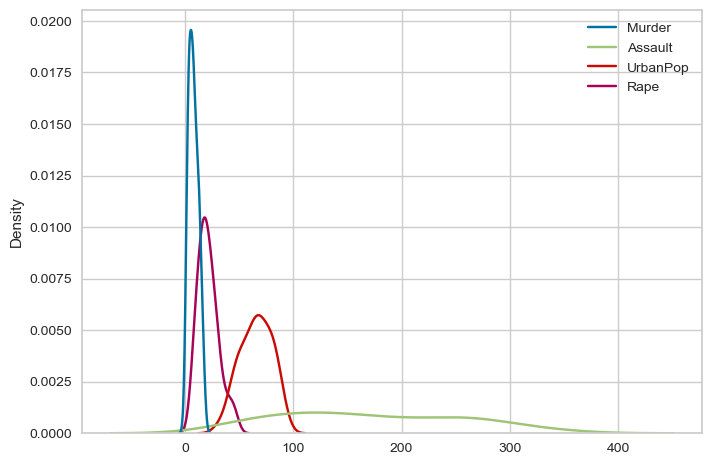

Assault


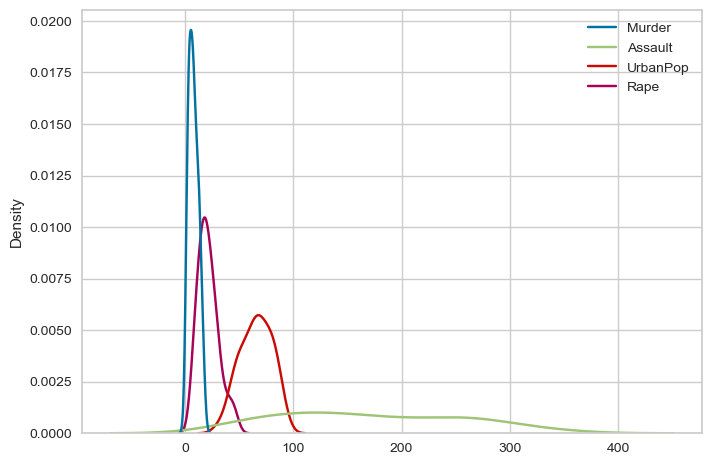

UrbanPop


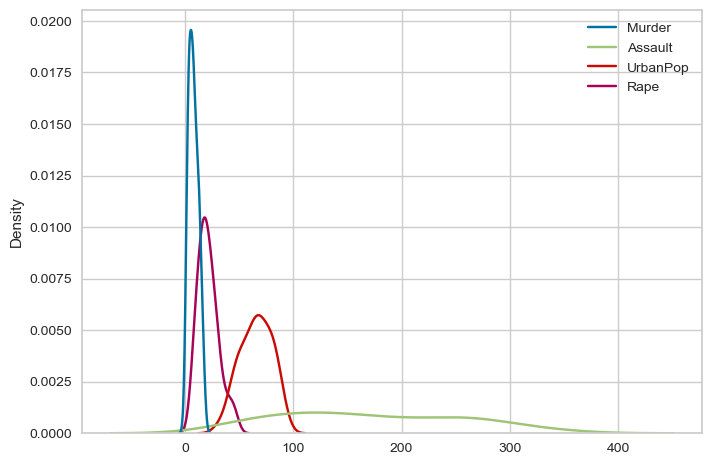

Rape


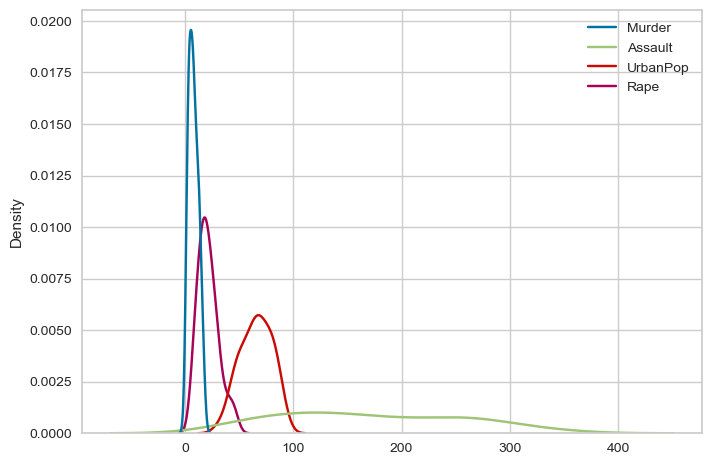

In [14]:
# Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data)
    plt.show()

In [15]:
# Outliers Detection
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

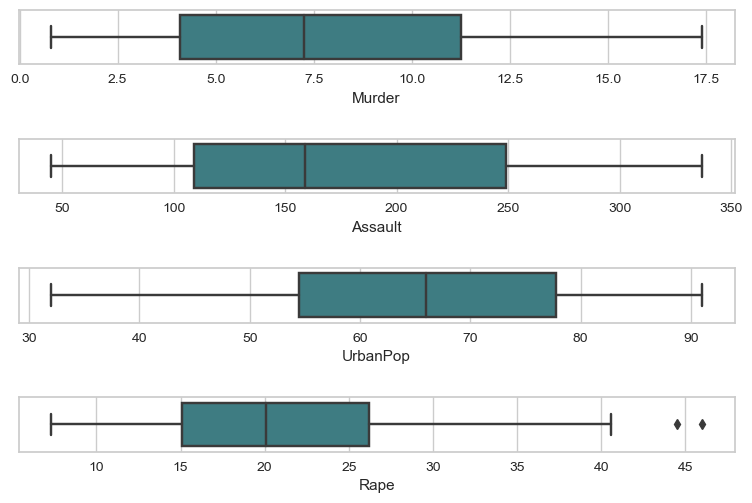

In [16]:
ot= data.copy() 
fig, axes= plt.subplots(4,1,sharex= False,sharey= False)
sns.boxplot(x= 'Murder', data= ot, palette= 'crest', ax= axes[0])
sns.boxplot(x= 'Assault', data= ot, palette= 'crest', ax= axes[1])
sns.boxplot(x= 'UrbanPop', data= ot, palette= 'crest', ax= axes[2])
sns.boxplot(x= 'Rape', data= ot, palette= 'crest', ax= axes[3])
plt.tight_layout(pad= 2.0)

<Axes: >

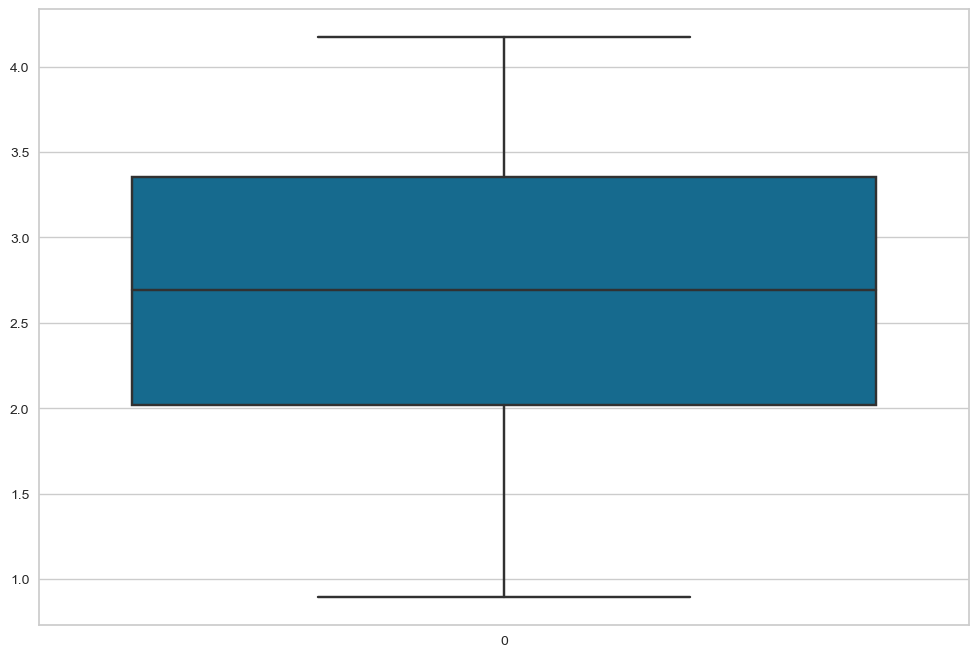

In [17]:
# we use sqrt() to see more clearly despite the outliers
plt.figure(figsize= (12,8))
sns.boxplot(data= np.sqrt(data['Murder']))

<Axes: >

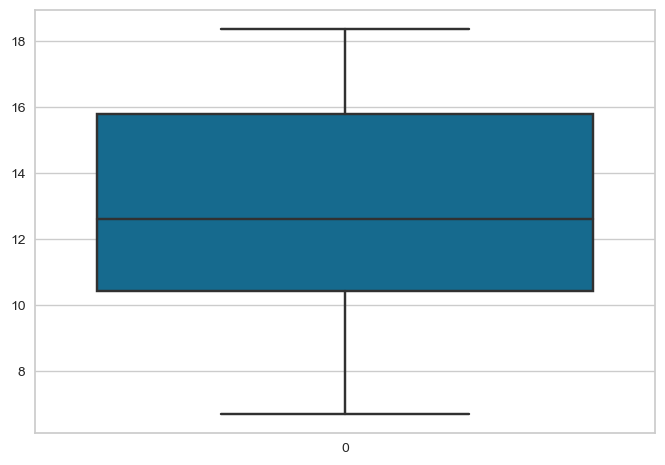

In [18]:
plt.figure
sns.boxplot(data=np.sqrt(data['Assault']))

<Axes: >

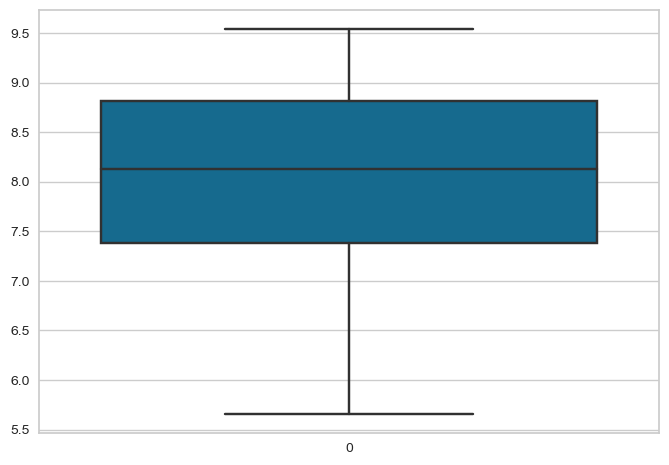

In [19]:
plt.figure
sns.boxplot(data=np.sqrt(data['UrbanPop']))

<Axes: >

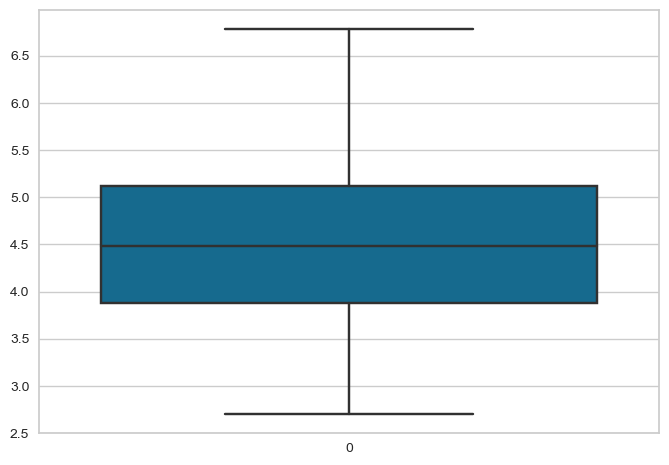

In [20]:
plt.figure
sns.boxplot(data=np.sqrt(data['Rape']))

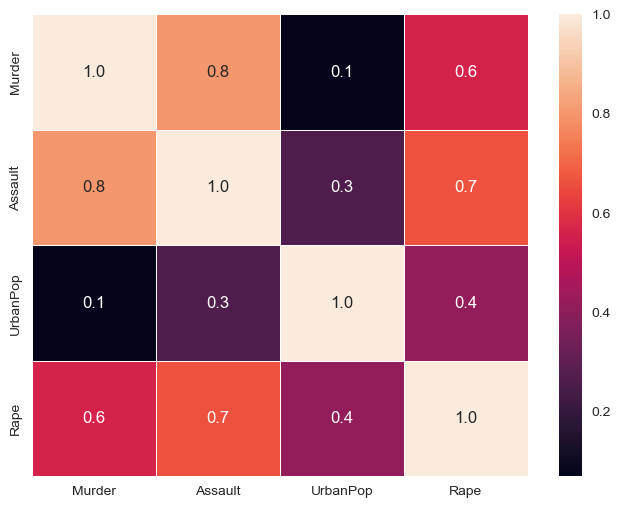

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=['number'])

# Create a correlation heatmap
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

# Show the correlation heatmap
plt.show()


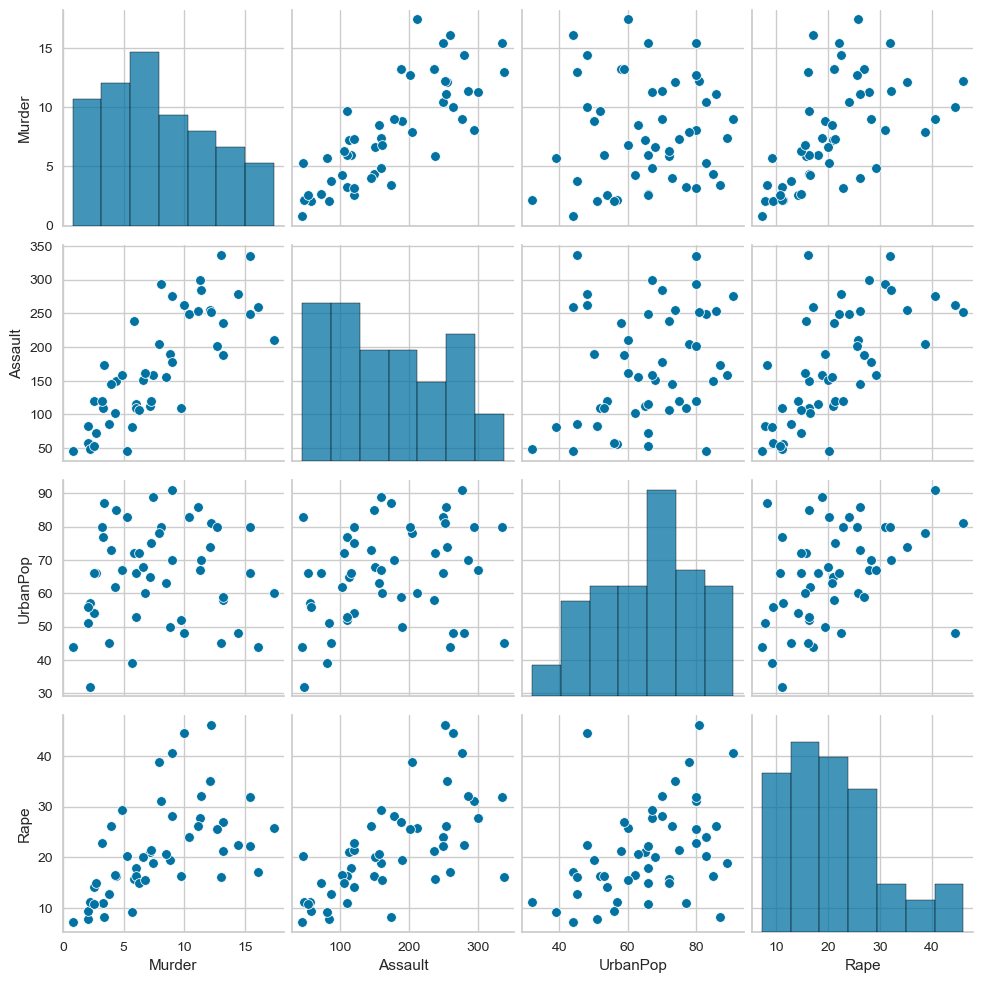

In [24]:
sns.pairplot(data)

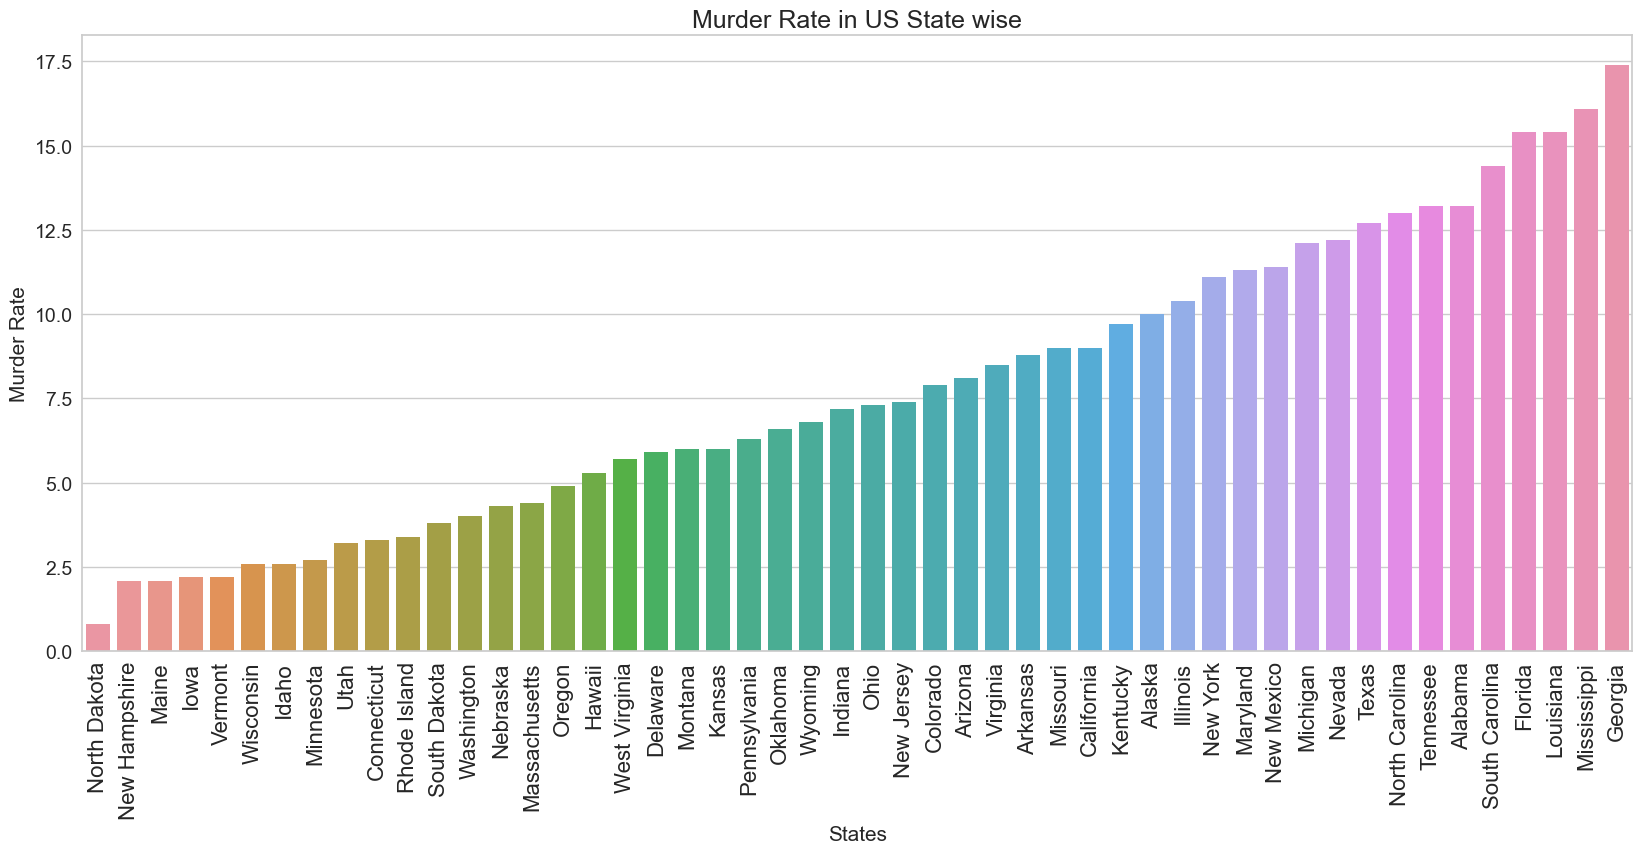

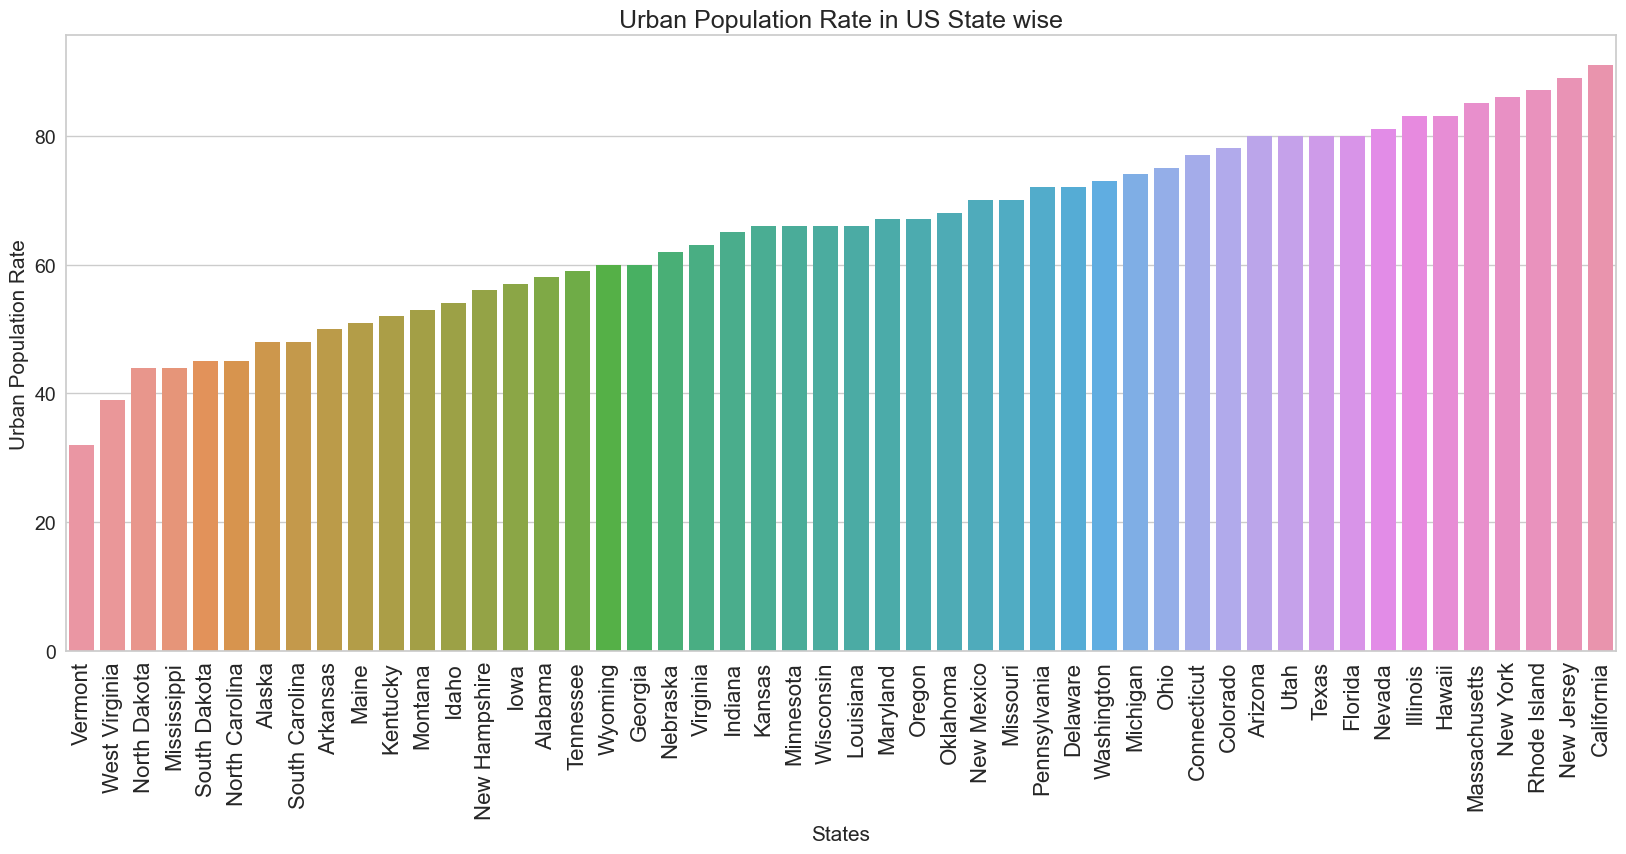

In [25]:
# Murder Rate
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(
    data = data,
    x='States',
    y="Murder",
    order=data.sort_values('Murder').States
            )
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(
    data=data,
    x='States',
    y="UrbanPop", 
    order=data.sort_values('UrbanPop').States
            )
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [26]:
print('States According to the Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

States According to the Highest Murder Rate


States  Murder  Assault  UrbanPop  Rape
9          Georgia    17.4      211        60  25.8
23     Mississippi    16.1      259        44  17.1
8          Florida    15.4      335        80  31.9
17       Louisiana    15.4      249        66  22.2
39  South Carolina    14.4      279        48  22.5
0          Alabama    13.2      236        58  21.2
41       Tennessee    13.2      188        59  26.9
32  North Carolina    13.0      337        45  16.1
42           Texas    12.7      201        80  25.5
27          Nevada    12.2      252        81  46.0

In [27]:
print('Top 10 States according to the Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States according to the Lowest Murder Rate


States  Murder  Assault  UrbanPop  Rape
33   North Dakota     0.8       45        44   7.3
28  New Hampshire     2.1       57        56   9.5
18          Maine     2.1       83        51   7.8
14           Iowa     2.2       56        57  11.3
44        Vermont     2.2       48        32  11.2
48      Wisconsin     2.6       53        66  10.8
11          Idaho     2.6      120        54  14.2
22      Minnesota     2.7       72        66  14.9
43           Utah     3.2      120        80  22.9
6     Connecticut     3.3      110        77  11.1

In [28]:
murder = data.sort_values('Murder', ascending = False, ignore_index=True)
murder

States  Murder  Assault  UrbanPop  Rape
0          Georgia    17.4      211        60  25.8
1      Mississippi    16.1      259        44  17.1
2          Florida    15.4      335        80  31.9
3        Louisiana    15.4      249        66  22.2
4   South Carolina    14.4      279        48  22.5
5          Alabama    13.2      236        58  21.2
6        Tennessee    13.2      188        59  26.9
7   North Carolina    13.0      337        45  16.1
8            Texas    12.7      201        80  25.5
9           Nevada    12.2      252        81  46.0
10        Michigan    12.1      255        74  35.1
11      New Mexico    11.4      285        70  32.1
12        Maryland    11.3      300        67  27.8
13        New York    11.1      254        86  26.1
14        Illinois    10.4      249        83  24.0
15          Alaska    10.0      263        48  44.5
16        Kentucky     9.7      109        52  16.3
17      California     9.0      276        91  40.6
18        Missouri     9.0      178        70  28.2
19        Arkansas     8.8      190        50  19.5
20        Virginia     8.5      156        63  20.7
21         Arizona     8.1      294        80  31.0
22        Colorado     7.9      204        78  38.7
23      New Jersey     7.4      159        89  18.8
24            Ohio     7.3      120        75  21.4
25         Indiana     7.2      113        65  21.0
26         Wyoming     6.8      161        60  15.6
27        Oklahoma     6.6      151        68  20.0
28    Pennsylvania     6.3      106        72  14.9
29         Montana     6.0      109        53  16.4
30          Kansas     6.0      115        66  18.0
31        Delaware     5.9      238        72  15.8
32   West Virginia     5.7       81        39   9.3
33          Hawaii     5.3       46        83  20.2
34          Oregon     4.9      159        67  29.3
35   Massachusetts     4.4      149        85  16.3
36        Nebraska     4.3      102        62  16.5
37      Washington     4.0      145        73  26.2
38    South Dakota     3.8       86        45  12.8
39    Rhode Island     3.4      174        87   8.3
40     Connecticut     3.3      110        77  11.1
41            Utah     3.2      120        80  22.9
42       Minnesota     2.7       72        66  14.9
43           Idaho     2.6      120        54  14.2
44       Wisconsin     2.6       53        66  10.8
45            Iowa     2.2       56        57  11.3
46         Vermont     2.2       48        32  11.2
47   New Hampshire     2.1       57        56   9.5
48           Maine     2.1       83        51   7.8
49    North Dakota     0.8       45        44   7.3

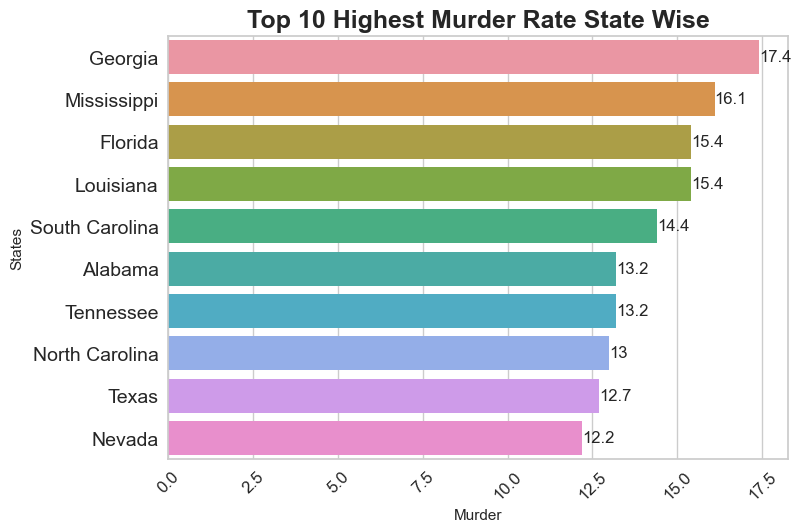

In [29]:
plt.figure
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [30]:
murder = data.sort_values('Murder', ascending = True,ignore_index=True)
murder

States  Murder  Assault  UrbanPop  Rape
0     North Dakota     0.8       45        44   7.3
1    New Hampshire     2.1       57        56   9.5
2            Maine     2.1       83        51   7.8
3             Iowa     2.2       56        57  11.3
4          Vermont     2.2       48        32  11.2
5        Wisconsin     2.6       53        66  10.8
6            Idaho     2.6      120        54  14.2
7        Minnesota     2.7       72        66  14.9
8             Utah     3.2      120        80  22.9
9      Connecticut     3.3      110        77  11.1
10    Rhode Island     3.4      174        87   8.3
11    South Dakota     3.8       86        45  12.8
12      Washington     4.0      145        73  26.2
13        Nebraska     4.3      102        62  16.5
14   Massachusetts     4.4      149        85  16.3
15          Oregon     4.9      159        67  29.3
16          Hawaii     5.3       46        83  20.2
17   West Virginia     5.7       81        39   9.3
18        Delaware     5.9      238        72  15.8
19         Montana     6.0      109        53  16.4
20          Kansas     6.0      115        66  18.0
21    Pennsylvania     6.3      106        72  14.9
22        Oklahoma     6.6      151        68  20.0
23         Wyoming     6.8      161        60  15.6
24         Indiana     7.2      113        65  21.0
25            Ohio     7.3      120        75  21.4
26      New Jersey     7.4      159        89  18.8
27        Colorado     7.9      204        78  38.7
28         Arizona     8.1      294        80  31.0
29        Virginia     8.5      156        63  20.7
30        Arkansas     8.8      190        50  19.5
31        Missouri     9.0      178        70  28.2
32      California     9.0      276        91  40.6
33        Kentucky     9.7      109        52  16.3
34          Alaska    10.0      263        48  44.5
35        Illinois    10.4      249        83  24.0
36        New York    11.1      254        86  26.1
37        Maryland    11.3      300        67  27.8
38      New Mexico    11.4      285        70  32.1
39        Michigan    12.1      255        74  35.1
40          Nevada    12.2      252        81  46.0
41           Texas    12.7      201        80  25.5
42  North Carolina    13.0      337        45  16.1
43       Tennessee    13.2      188        59  26.9
44         Alabama    13.2      236        58  21.2
45  South Carolina    14.4      279        48  22.5
46         Florida    15.4      335        80  31.9
47       Louisiana    15.4      249        66  22.2
48     Mississippi    16.1      259        44  17.1
49         Georgia    17.4      211        60  25.8

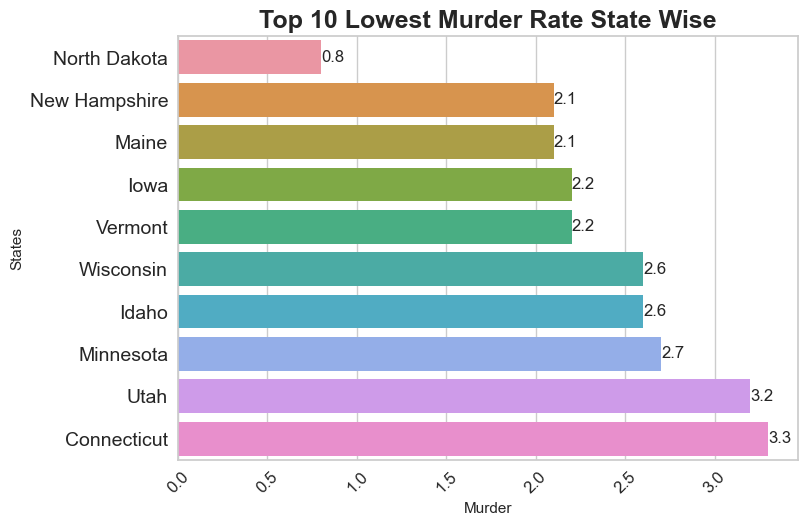

In [31]:
plt.figure
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

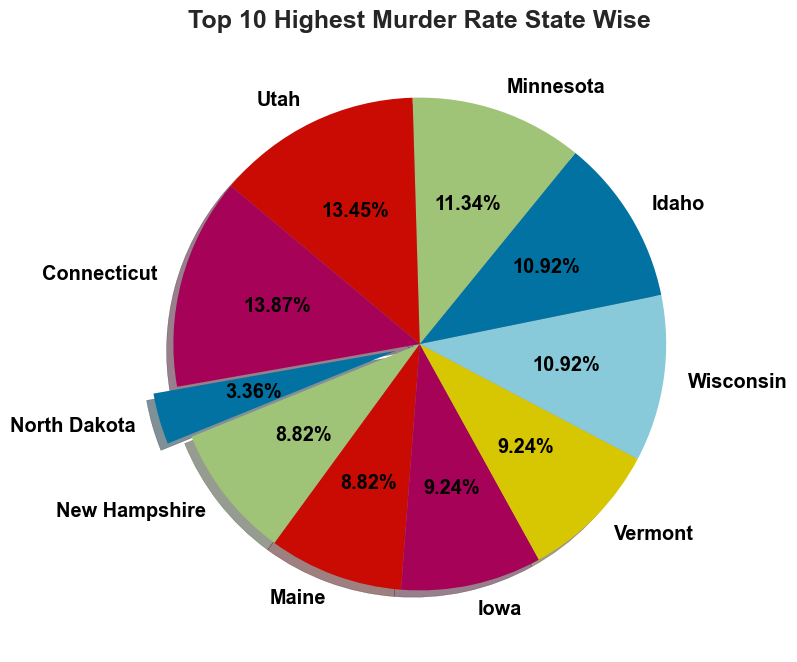

In [32]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

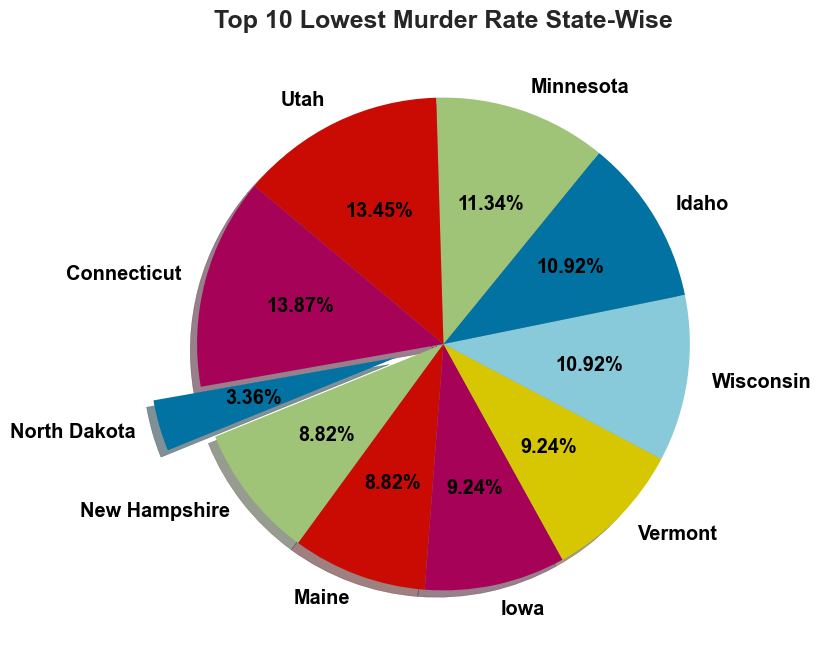

In [33]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

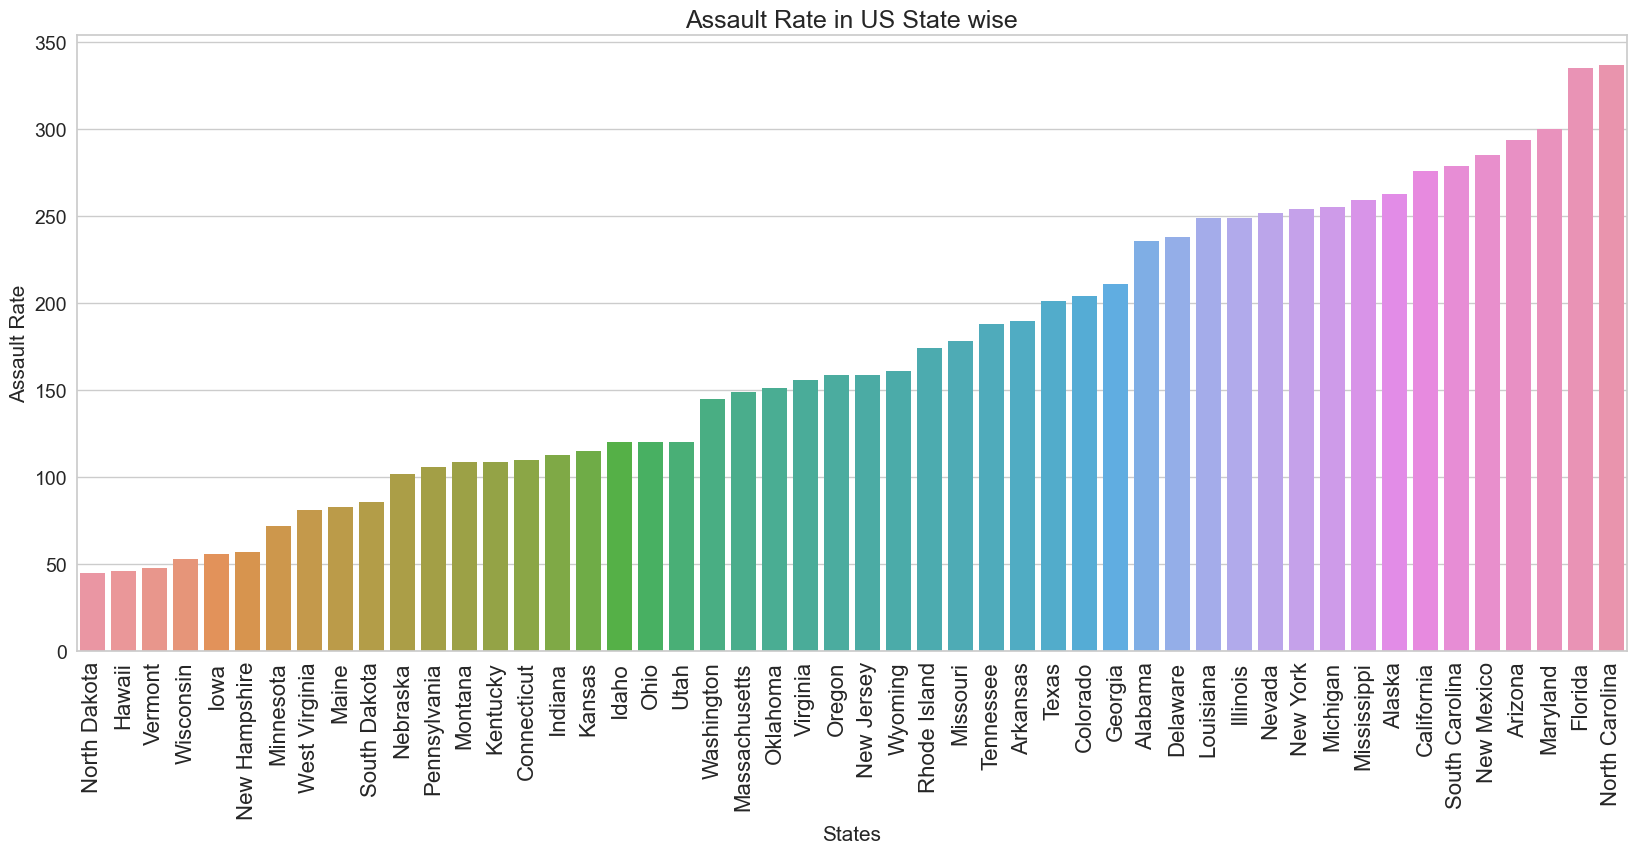

In [34]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Assault", 
            data=data, 
            order=data.sort_values('Assault').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

In [35]:
print('Top 10 States with Highest Assault Rate')
data.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


States  Murder  Assault  UrbanPop  Rape
0  North Carolina    13.0      337        45  16.1
1         Florida    15.4      335        80  31.9
2        Maryland    11.3      300        67  27.8
3         Arizona     8.1      294        80  31.0
4      New Mexico    11.4      285        70  32.1
5  South Carolina    14.4      279        48  22.5
6      California     9.0      276        91  40.6
7          Alaska    10.0      263        48  44.5
8     Mississippi    16.1      259        44  17.1
9        Michigan    12.1      255        74  35.1

In [36]:
print('Top 10 States with Lowest Assault Rate')
data.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1         Hawaii     5.3       46        83  20.2
2        Vermont     2.2       48        32  11.2
3      Wisconsin     2.6       53        66  10.8
4           Iowa     2.2       56        57  11.3
5  New Hampshire     2.1       57        56   9.5
6      Minnesota     2.7       72        66  14.9
7  West Virginia     5.7       81        39   9.3
8          Maine     2.1       83        51   7.8
9   South Dakota     3.8       86        45  12.8

In [37]:
Assault = data.sort_values('Assault', ascending = False)
Assault

States  Murder  Assault  UrbanPop  Rape
32  North Carolina    13.0      337        45  16.1
8          Florida    15.4      335        80  31.9
19        Maryland    11.3      300        67  27.8
2          Arizona     8.1      294        80  31.0
30      New Mexico    11.4      285        70  32.1
39  South Carolina    14.4      279        48  22.5
4       California     9.0      276        91  40.6
1           Alaska    10.0      263        48  44.5
23     Mississippi    16.1      259        44  17.1
21        Michigan    12.1      255        74  35.1
31        New York    11.1      254        86  26.1
27          Nevada    12.2      252        81  46.0
17       Louisiana    15.4      249        66  22.2
12        Illinois    10.4      249        83  24.0
7         Delaware     5.9      238        72  15.8
0          Alabama    13.2      236        58  21.2
9          Georgia    17.4      211        60  25.8
5         Colorado     7.9      204        78  38.7
42           Texas    12.7      201        80  25.5
3         Arkansas     8.8      190        50  19.5
41       Tennessee    13.2      188        59  26.9
24        Missouri     9.0      178        70  28.2
38    Rhode Island     3.4      174        87   8.3
49         Wyoming     6.8      161        60  15.6
29      New Jersey     7.4      159        89  18.8
36          Oregon     4.9      159        67  29.3
45        Virginia     8.5      156        63  20.7
35        Oklahoma     6.6      151        68  20.0
20   Massachusetts     4.4      149        85  16.3
46      Washington     4.0      145        73  26.2
43            Utah     3.2      120        80  22.9
11           Idaho     2.6      120        54  14.2
34            Ohio     7.3      120        75  21.4
15          Kansas     6.0      115        66  18.0
13         Indiana     7.2      113        65  21.0
6      Connecticut     3.3      110        77  11.1
25         Montana     6.0      109        53  16.4
16        Kentucky     9.7      109        52  16.3
37    Pennsylvania     6.3      106        72  14.9
26        Nebraska     4.3      102        62  16.5
40    South Dakota     3.8       86        45  12.8
18           Maine     2.1       83        51   7.8
47   West Virginia     5.7       81        39   9.3
22       Minnesota     2.7       72        66  14.9
28   New Hampshire     2.1       57        56   9.5
14            Iowa     2.2       56        57  11.3
48       Wisconsin     2.6       53        66  10.8
44         Vermont     2.2       48        32  11.2
10          Hawaii     5.3       46        83  20.2
33    North Dakota     0.8       45        44   7.3

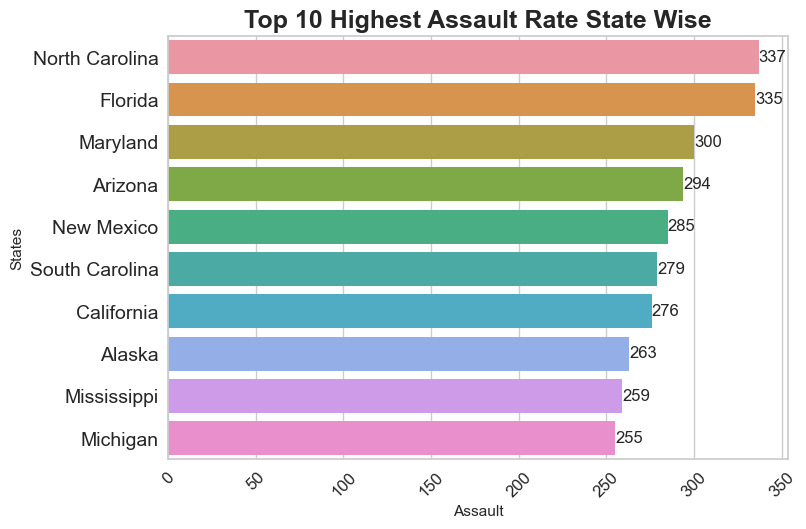

In [38]:
plt.figure
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

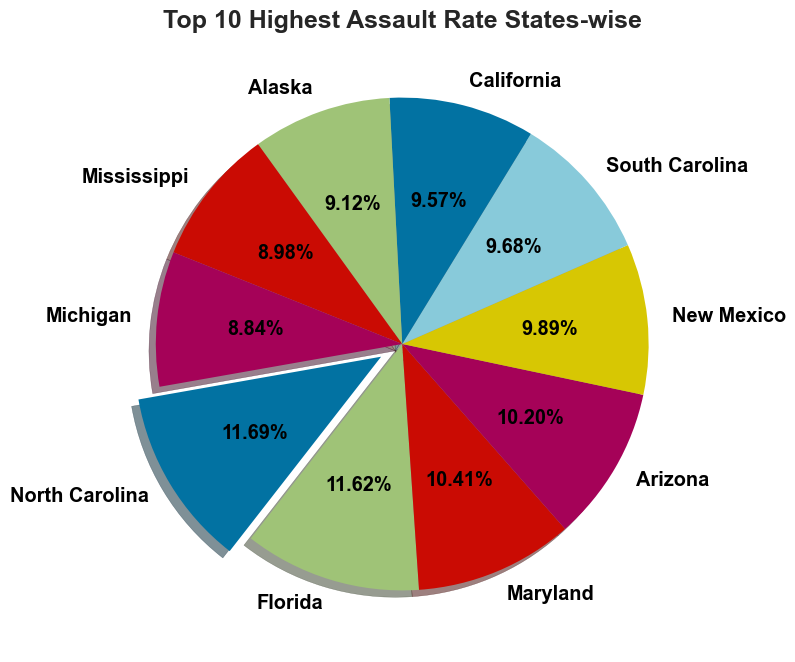

In [39]:
plt.figure(figsize = (8,8))
plt.pie(Assault.Assault[:10],
       labels=Assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [40]:
assault = data.sort_values('Assault', ascending = True)
assault

States  Murder  Assault  UrbanPop  Rape
33    North Dakota     0.8       45        44   7.3
10          Hawaii     5.3       46        83  20.2
44         Vermont     2.2       48        32  11.2
48       Wisconsin     2.6       53        66  10.8
14            Iowa     2.2       56        57  11.3
28   New Hampshire     2.1       57        56   9.5
22       Minnesota     2.7       72        66  14.9
47   West Virginia     5.7       81        39   9.3
18           Maine     2.1       83        51   7.8
40    South Dakota     3.8       86        45  12.8
26        Nebraska     4.3      102        62  16.5
37    Pennsylvania     6.3      106        72  14.9
25         Montana     6.0      109        53  16.4
16        Kentucky     9.7      109        52  16.3
6      Connecticut     3.3      110        77  11.1
13         Indiana     7.2      113        65  21.0
15          Kansas     6.0      115        66  18.0
11           Idaho     2.6      120        54  14.2
34            Ohio     7.3      120        75  21.4
43            Utah     3.2      120        80  22.9
46      Washington     4.0      145        73  26.2
20   Massachusetts     4.4      149        85  16.3
35        Oklahoma     6.6      151        68  20.0
45        Virginia     8.5      156        63  20.7
36          Oregon     4.9      159        67  29.3
29      New Jersey     7.4      159        89  18.8
49         Wyoming     6.8      161        60  15.6
38    Rhode Island     3.4      174        87   8.3
24        Missouri     9.0      178        70  28.2
41       Tennessee    13.2      188        59  26.9
3         Arkansas     8.8      190        50  19.5
42           Texas    12.7      201        80  25.5
5         Colorado     7.9      204        78  38.7
9          Georgia    17.4      211        60  25.8
0          Alabama    13.2      236        58  21.2
7         Delaware     5.9      238        72  15.8
17       Louisiana    15.4      249        66  22.2
12        Illinois    10.4      249        83  24.0
27          Nevada    12.2      252        81  46.0
31        New York    11.1      254        86  26.1
21        Michigan    12.1      255        74  35.1
23     Mississippi    16.1      259        44  17.1
1           Alaska    10.0      263        48  44.5
4       California     9.0      276        91  40.6
39  South Carolina    14.4      279        48  22.5
30      New Mexico    11.4      285        70  32.1
2          Arizona     8.1      294        80  31.0
19        Maryland    11.3      300        67  27.8
8          Florida    15.4      335        80  31.9
32  North Carolina    13.0      337        45  16.1

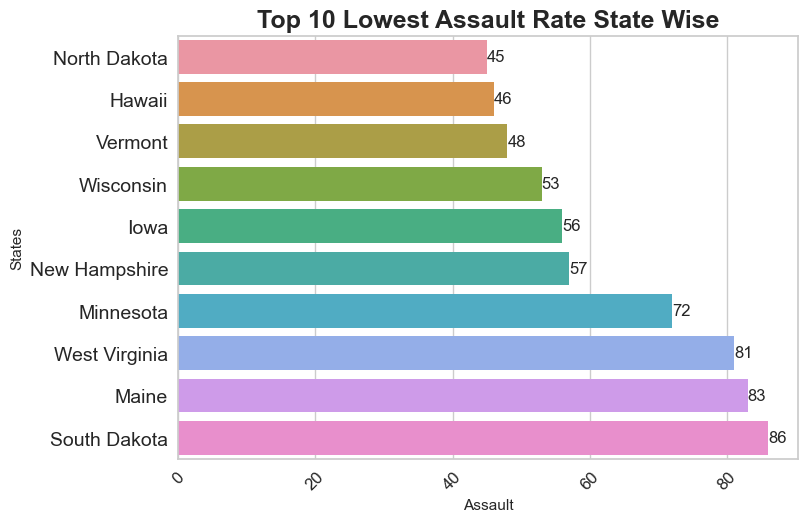

In [41]:
plt.figure
ax = sns.barplot(x = assault.Assault[:10], y = assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

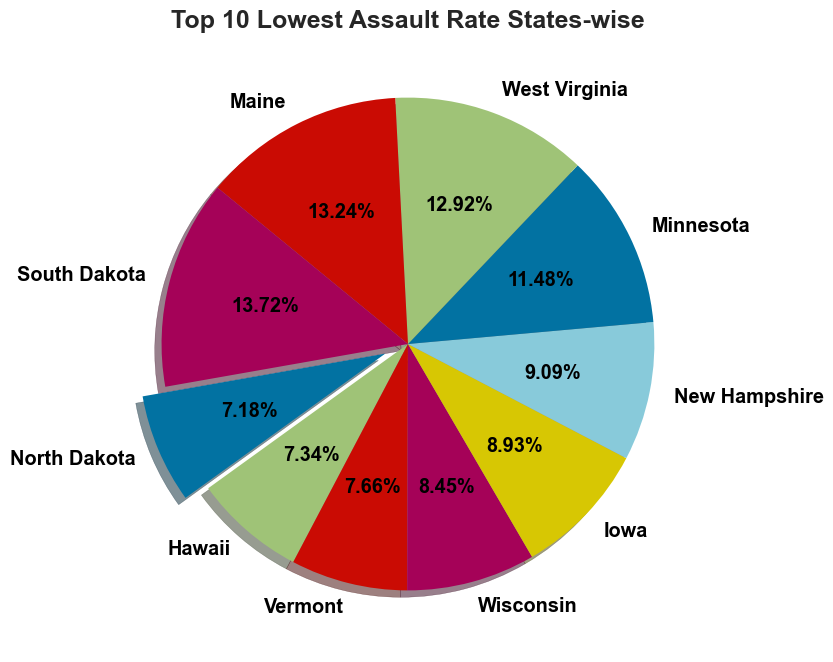

In [42]:
plt.figure(figsize = (8,8))
plt.pie(assault.Assault[:10],
       labels=assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

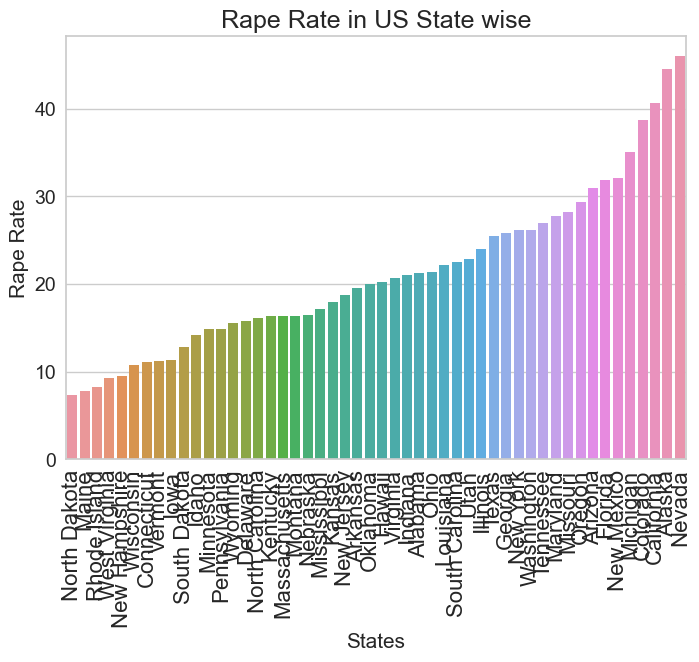

In [43]:
plt.figure
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape", 
            data=data, 
            order=data.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [44]:
print('Top 10 States with Highest Urban Population Rate')
data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


States  Murder  Assault  UrbanPop  Rape
0     California     9.0      276        91  40.6
1     New Jersey     7.4      159        89  18.8
2   Rhode Island     3.4      174        87   8.3
3       New York    11.1      254        86  26.1
4  Massachusetts     4.4      149        85  16.3
5         Hawaii     5.3       46        83  20.2
6       Illinois    10.4      249        83  24.0
7         Nevada    12.2      252        81  46.0
8          Texas    12.7      201        80  25.5
9        Arizona     8.1      294        80  31.0

In [45]:
urbanpop = data.sort_values('UrbanPop', ascending = False)
urbanpop

States  Murder  Assault  UrbanPop  Rape
4       California     9.0      276        91  40.6
29      New Jersey     7.4      159        89  18.8
38    Rhode Island     3.4      174        87   8.3
31        New York    11.1      254        86  26.1
20   Massachusetts     4.4      149        85  16.3
10          Hawaii     5.3       46        83  20.2
12        Illinois    10.4      249        83  24.0
27          Nevada    12.2      252        81  46.0
42           Texas    12.7      201        80  25.5
2          Arizona     8.1      294        80  31.0
8          Florida    15.4      335        80  31.9
43            Utah     3.2      120        80  22.9
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
34            Ohio     7.3      120        75  21.4
21        Michigan    12.1      255        74  35.1
46      Washington     4.0      145        73  26.2
7         Delaware     5.9      238        72  15.8
37    Pennsylvania     6.3      106        72  14.9
30      New Mexico    11.4      285        70  32.1
24        Missouri     9.0      178        70  28.2
35        Oklahoma     6.6      151        68  20.0
19        Maryland    11.3      300        67  27.8
36          Oregon     4.9      159        67  29.3
17       Louisiana    15.4      249        66  22.2
22       Minnesota     2.7       72        66  14.9
15          Kansas     6.0      115        66  18.0
48       Wisconsin     2.6       53        66  10.8
13         Indiana     7.2      113        65  21.0
45        Virginia     8.5      156        63  20.7
26        Nebraska     4.3      102        62  16.5
9          Georgia    17.4      211        60  25.8
49         Wyoming     6.8      161        60  15.6
41       Tennessee    13.2      188        59  26.9
0          Alabama    13.2      236        58  21.2
14            Iowa     2.2       56        57  11.3
28   New Hampshire     2.1       57        56   9.5
11           Idaho     2.6      120        54  14.2
25         Montana     6.0      109        53  16.4
16        Kentucky     9.7      109        52  16.3
18           Maine     2.1       83        51   7.8
3         Arkansas     8.8      190        50  19.5
1           Alaska    10.0      263        48  44.5
39  South Carolina    14.4      279        48  22.5
32  North Carolina    13.0      337        45  16.1
40    South Dakota     3.8       86        45  12.8
33    North Dakota     0.8       45        44   7.3
23     Mississippi    16.1      259        44  17.1
47   West Virginia     5.7       81        39   9.3
44         Vermont     2.2       48        32  11.2

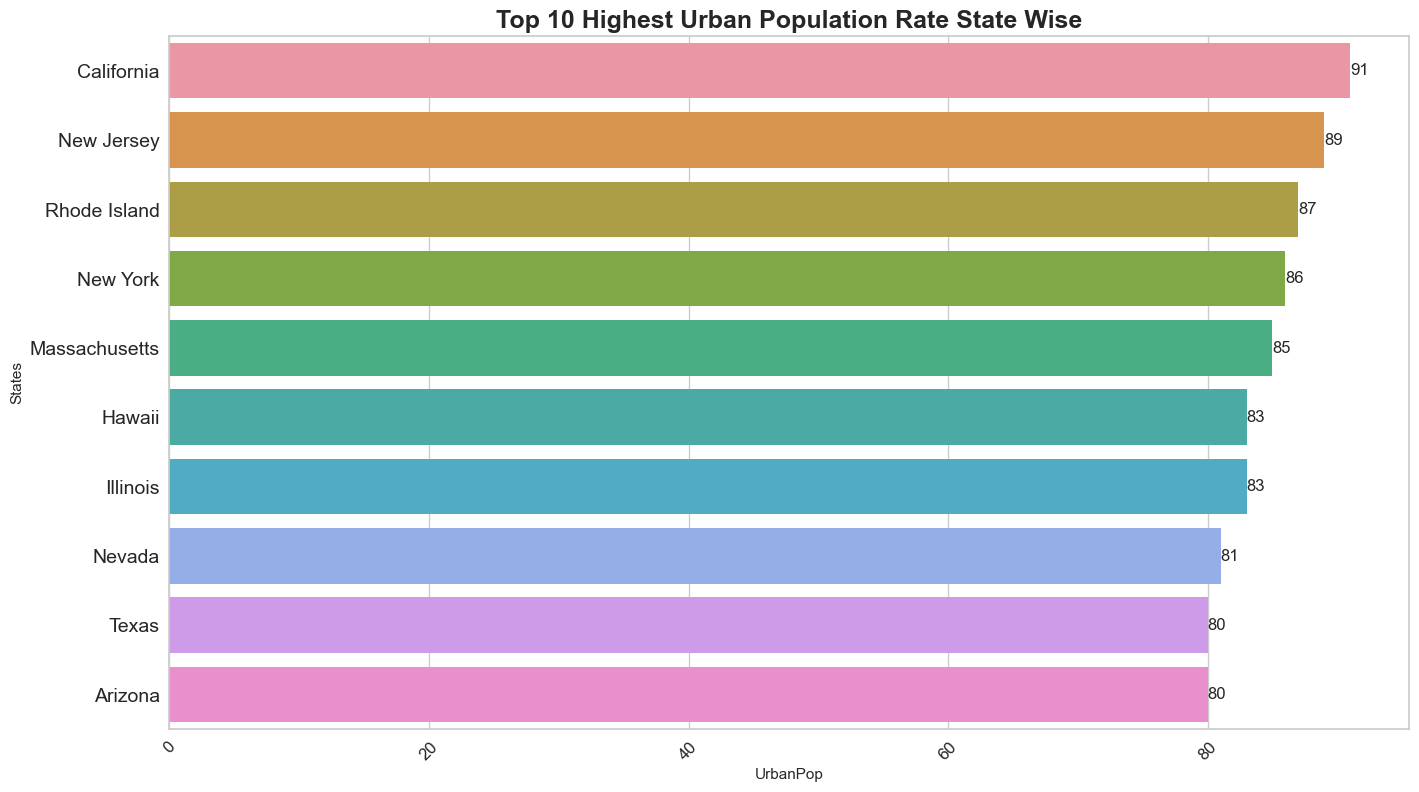

In [46]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

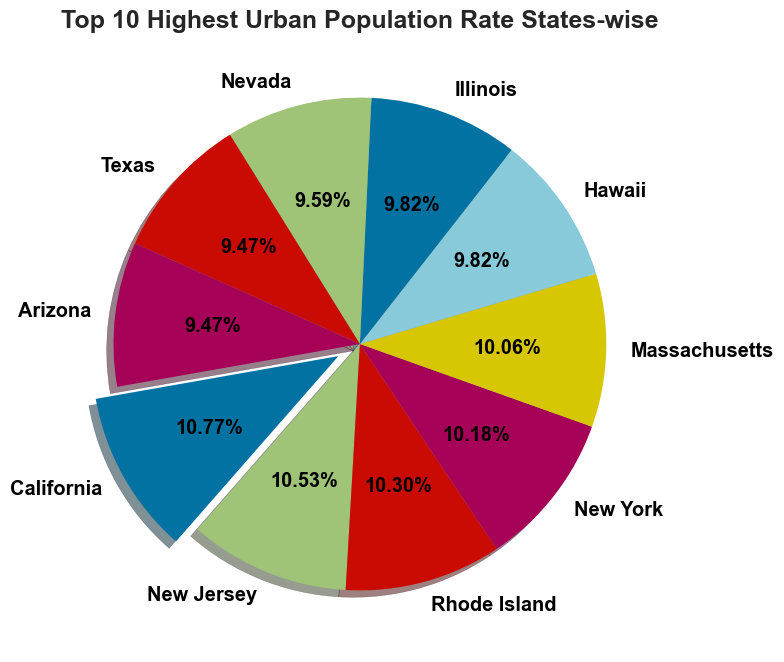

In [47]:

plt.figure(figsize = (8,8))
plt.pie(urbanpop.UrbanPop[:10],
       labels=urbanpop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [48]:
UrbanPop = data.sort_values('UrbanPop', ascending = True)
UrbanPop

States  Murder  Assault  UrbanPop  Rape
44         Vermont     2.2       48        32  11.2
47   West Virginia     5.7       81        39   9.3
33    North Dakota     0.8       45        44   7.3
23     Mississippi    16.1      259        44  17.1
40    South Dakota     3.8       86        45  12.8
32  North Carolina    13.0      337        45  16.1
1           Alaska    10.0      263        48  44.5
39  South Carolina    14.4      279        48  22.5
3         Arkansas     8.8      190        50  19.5
18           Maine     2.1       83        51   7.8
16        Kentucky     9.7      109        52  16.3
25         Montana     6.0      109        53  16.4
11           Idaho     2.6      120        54  14.2
28   New Hampshire     2.1       57        56   9.5
14            Iowa     2.2       56        57  11.3
0          Alabama    13.2      236        58  21.2
41       Tennessee    13.2      188        59  26.9
49         Wyoming     6.8      161        60  15.6
9          Georgia    17.4      211        60  25.8
26        Nebraska     4.3      102        62  16.5
45        Virginia     8.5      156        63  20.7
13         Indiana     7.2      113        65  21.0
15          Kansas     6.0      115        66  18.0
22       Minnesota     2.7       72        66  14.9
48       Wisconsin     2.6       53        66  10.8
17       Louisiana    15.4      249        66  22.2
19        Maryland    11.3      300        67  27.8
36          Oregon     4.9      159        67  29.3
35        Oklahoma     6.6      151        68  20.0
30      New Mexico    11.4      285        70  32.1
24        Missouri     9.0      178        70  28.2
37    Pennsylvania     6.3      106        72  14.9
7         Delaware     5.9      238        72  15.8
46      Washington     4.0      145        73  26.2
21        Michigan    12.1      255        74  35.1
34            Ohio     7.3      120        75  21.4
6      Connecticut     3.3      110        77  11.1
5         Colorado     7.9      204        78  38.7
2          Arizona     8.1      294        80  31.0
43            Utah     3.2      120        80  22.9
42           Texas    12.7      201        80  25.5
8          Florida    15.4      335        80  31.9
27          Nevada    12.2      252        81  46.0
12        Illinois    10.4      249        83  24.0
10          Hawaii     5.3       46        83  20.2
20   Massachusetts     4.4      149        85  16.3
31        New York    11.1      254        86  26.1
38    Rhode Island     3.4      174        87   8.3
29      New Jersey     7.4      159        89  18.8
4       California     9.0      276        91  40.6

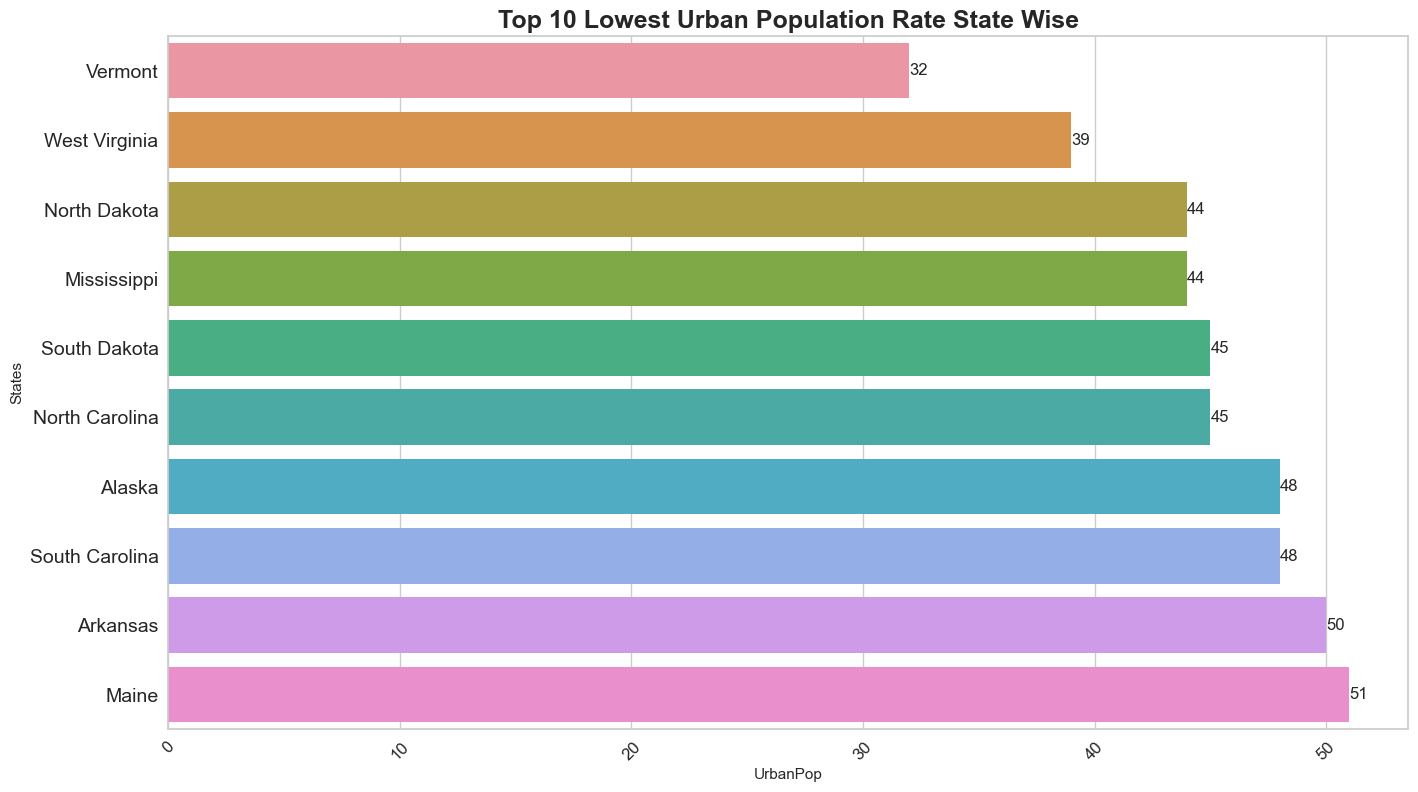

In [49]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = UrbanPop.UrbanPop[:10], y = UrbanPop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

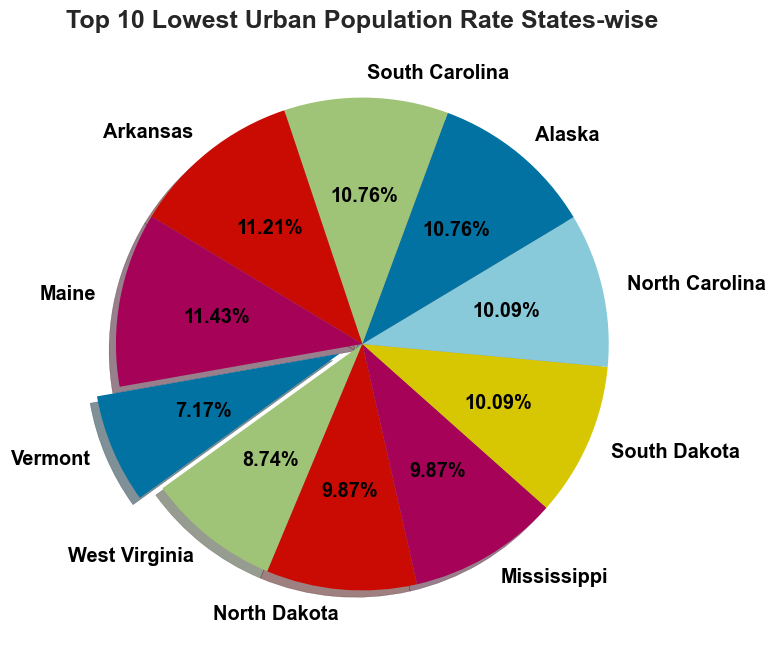

In [50]:
plt.figure(figsize = (8,8))
plt.pie(UrbanPop.UrbanPop[:10],
       labels=UrbanPop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [51]:
df = data.set_index('States')
df.head()

Murder  Assault  UrbanPop  Rape
States                                     
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [52]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [53]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

In [54]:
# Standard Scaler Applied on Data
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0              1      200.000000
1              2      104.961633
2              3       80.088861
3              4       57.554259
4              5       49.969203
5              6       43.982477
6              7       39.424039
7              8       35.874170
8              9       31.694118
9             10       28.137859
10            11       24.985982
11            12       22.777339
12            13       21.088470
13            14       19.606736

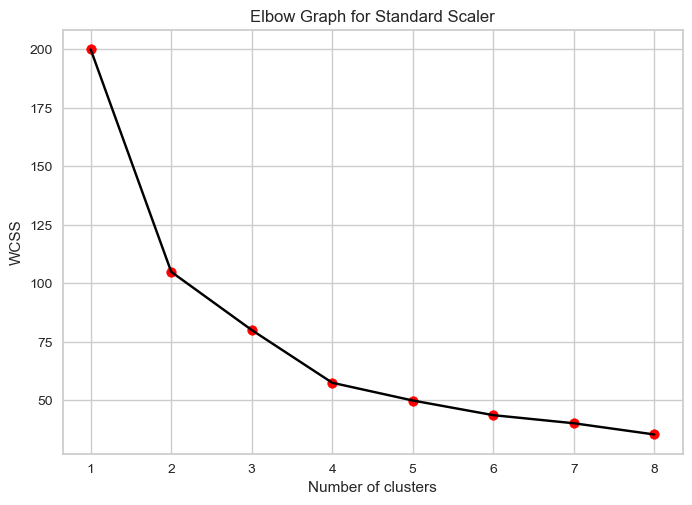

In [55]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

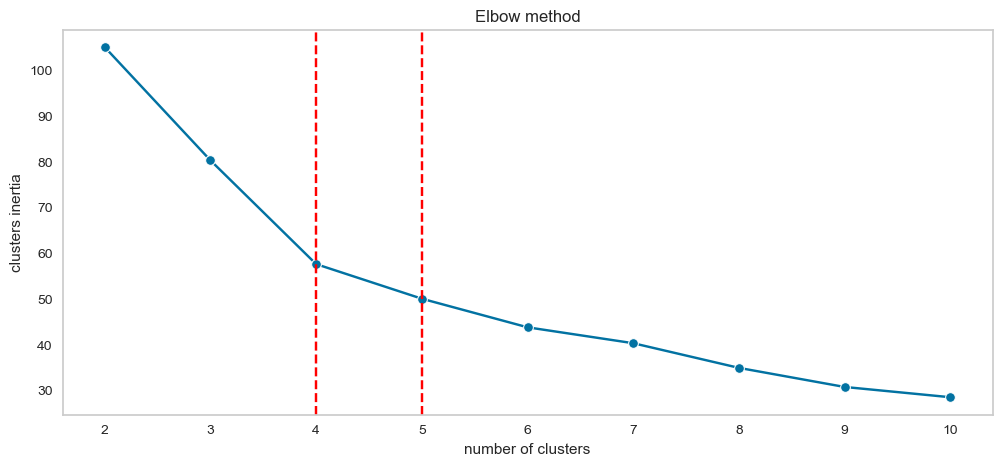

In [56]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = n_clusters, y = clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


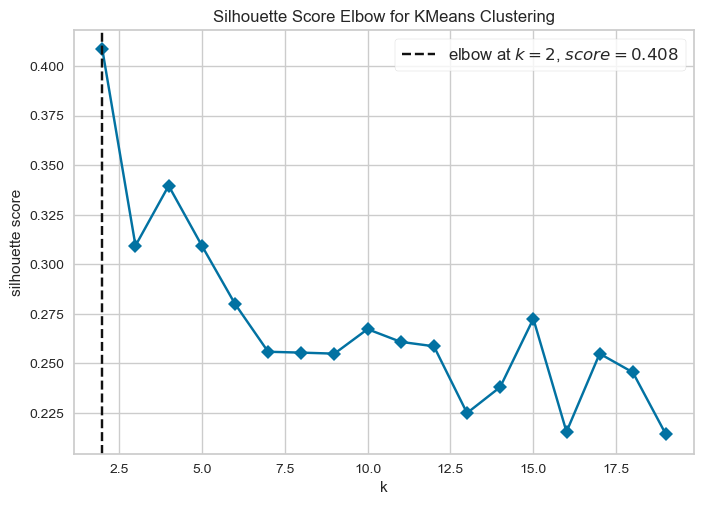

In [57]:
# 1. How many number of clusters? n_clusters?
# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

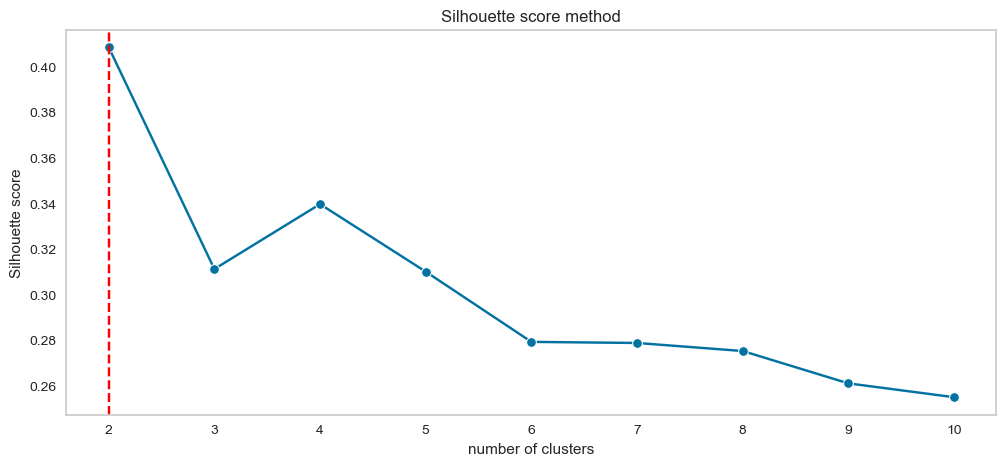

In [58]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [59]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.3068468000198128
For n_clusters = 6 The average silhouette_score is : 0.2811951614918648
For n_clusters = 7 The average silhouette_score is : 0.2775072951373062
For n_clusters = 8 The average silhouette_score is : 0.24471865342863663
For n_clusters = 9 The average silhouette_score is : 0.26142196370721515


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.3068468000198128
For n_clusters = 6 The average silhouette_score is : 0.2811951614918648
For n_clusters = 7 The average silhouette_score is : 0.2775072951373062
For n_clusters = 8 The average silhouette_score is : 0.24471865342863663
For n_clusters = 9 The average silhouette_score is : 0.26142196370721515


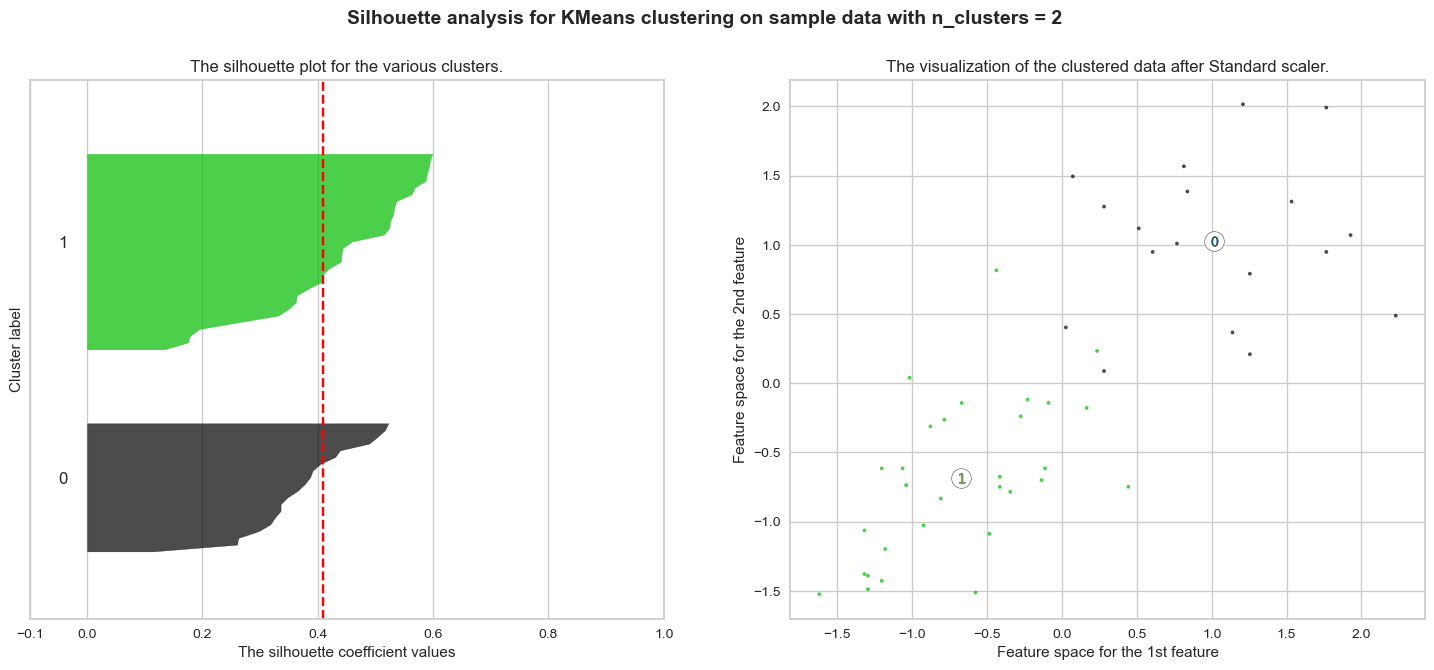

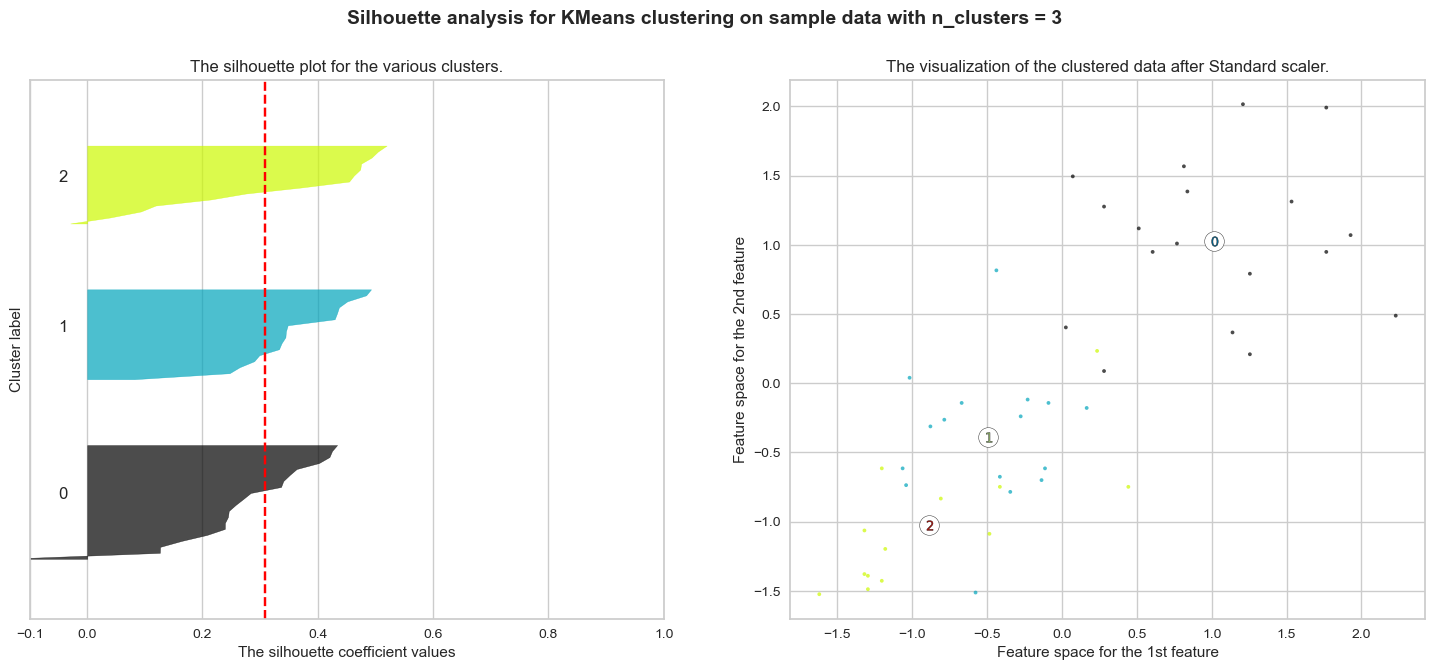

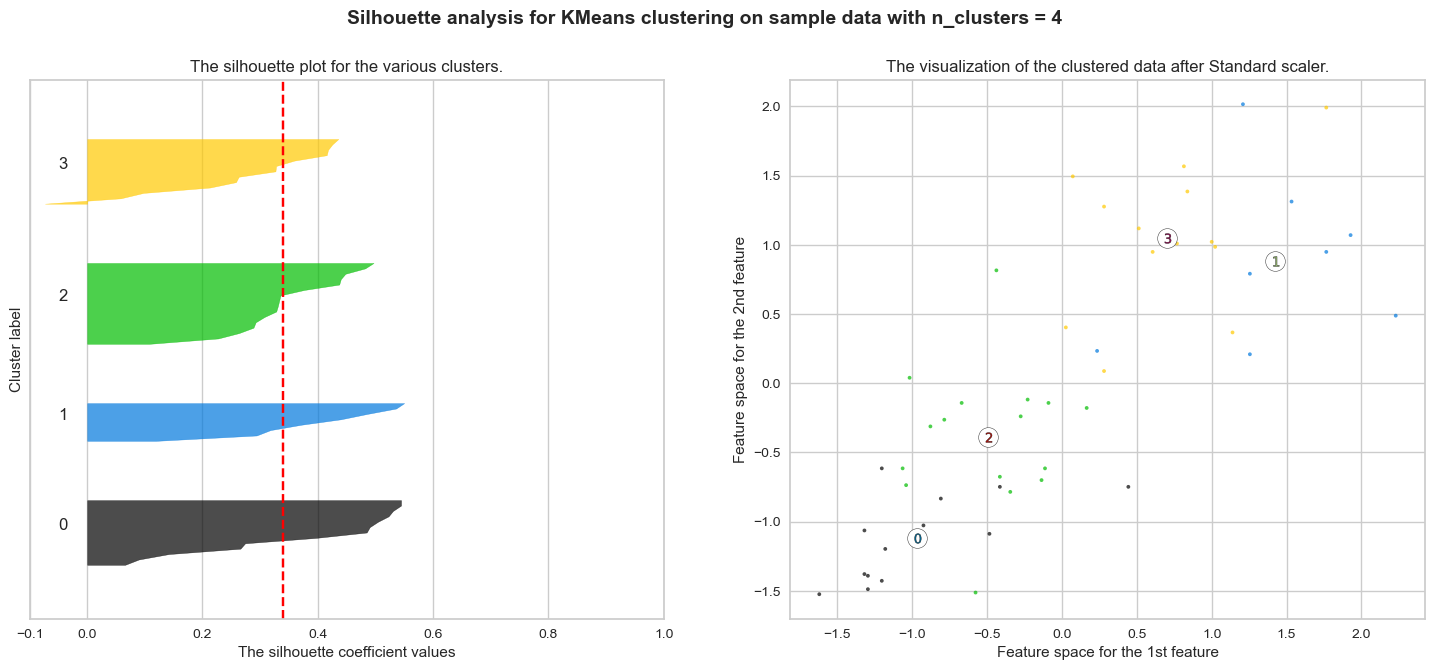

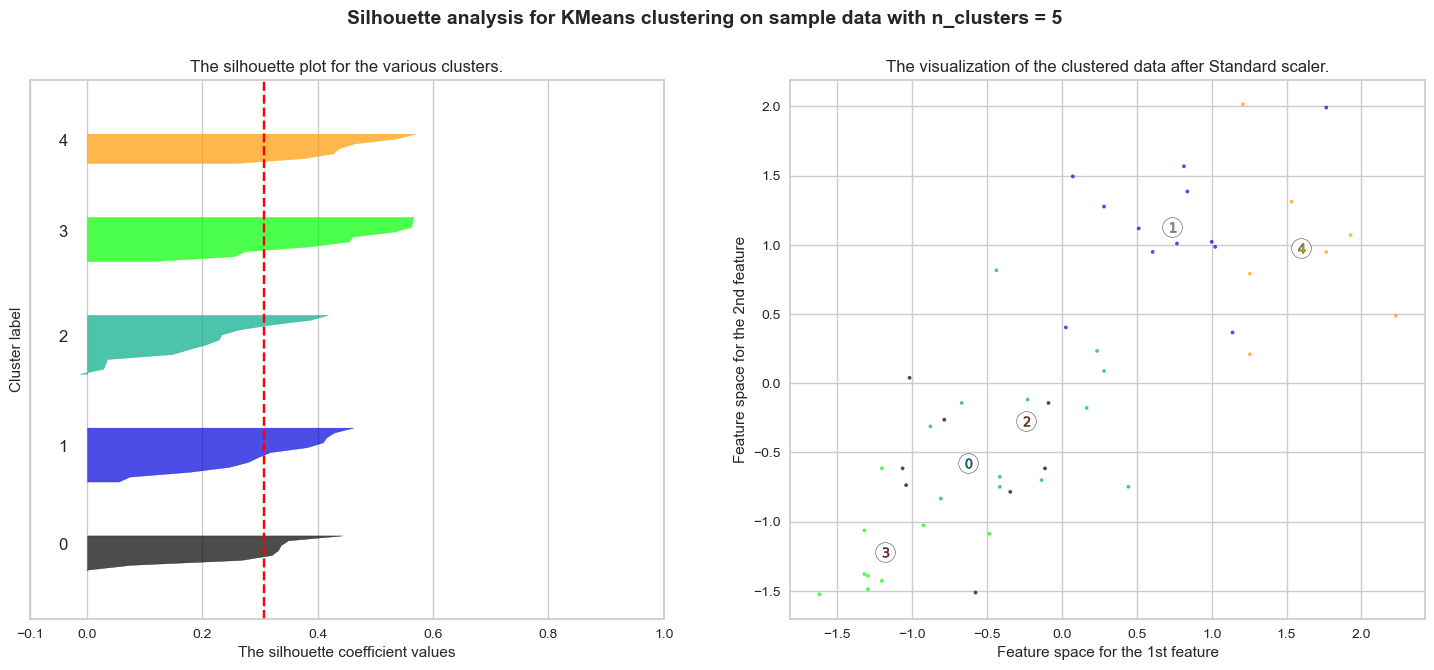

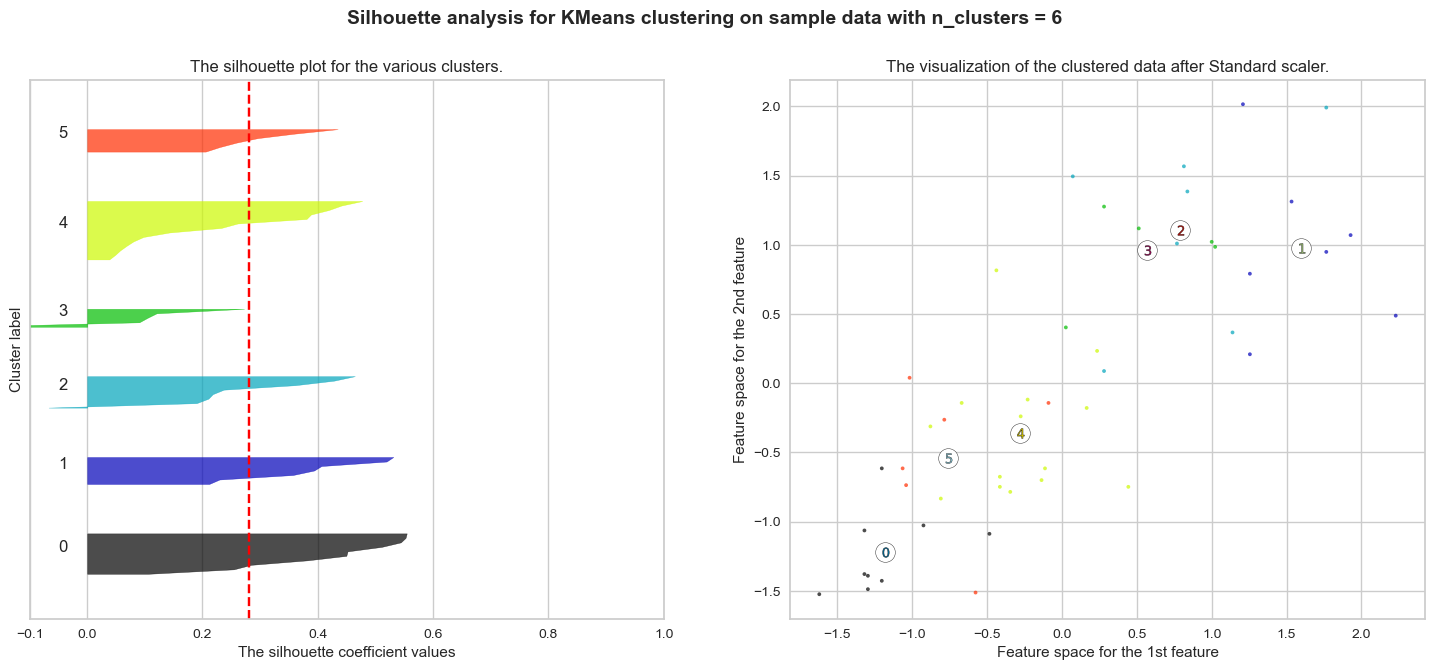

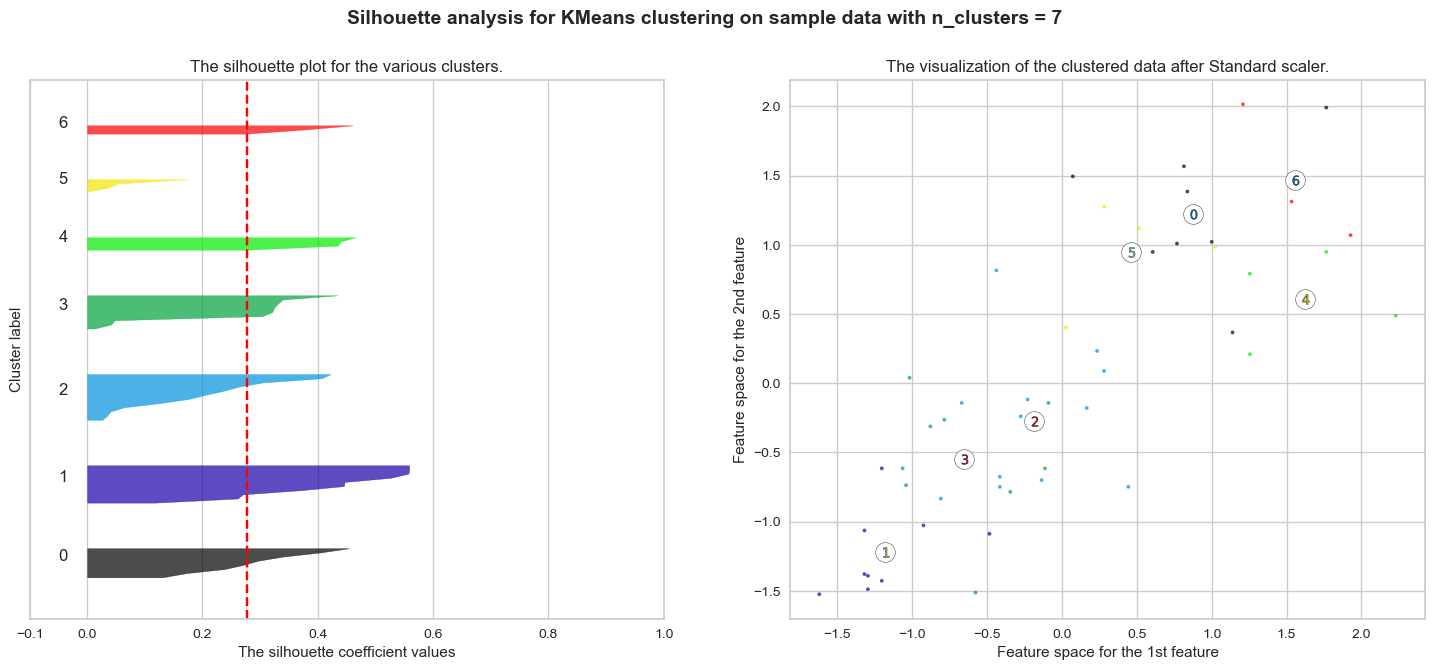

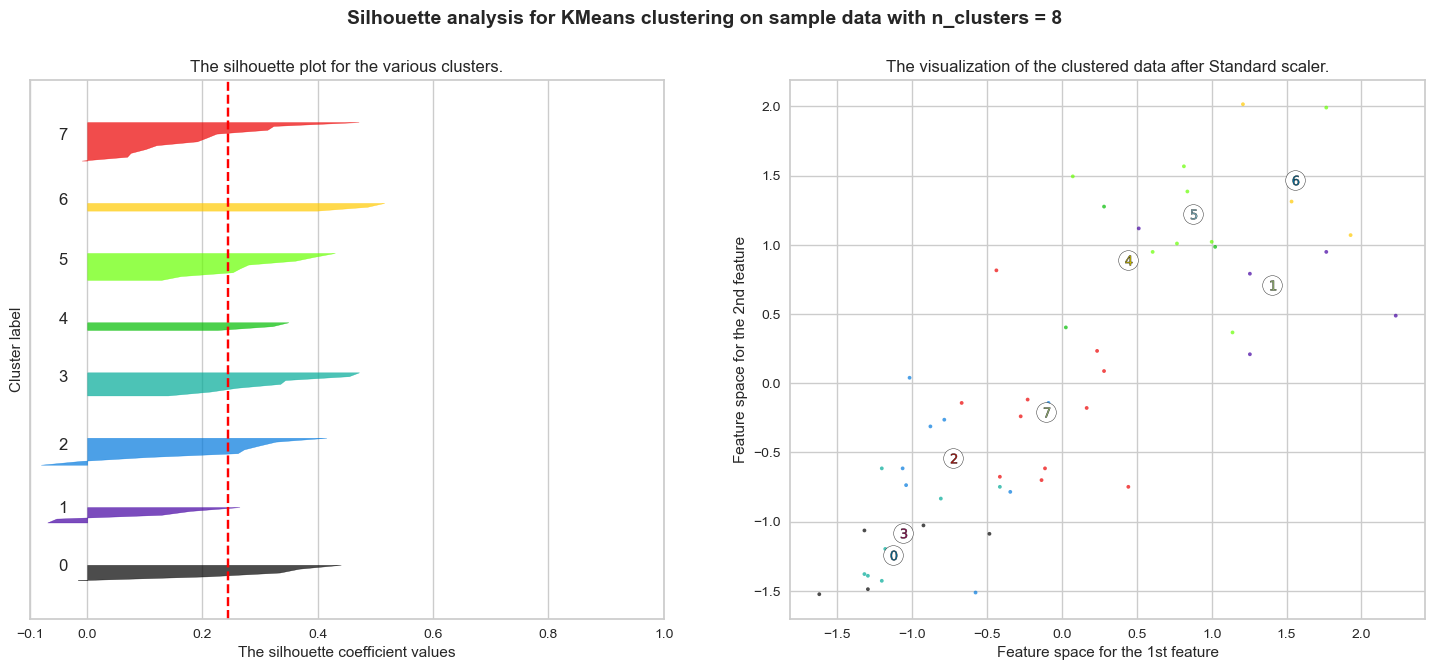

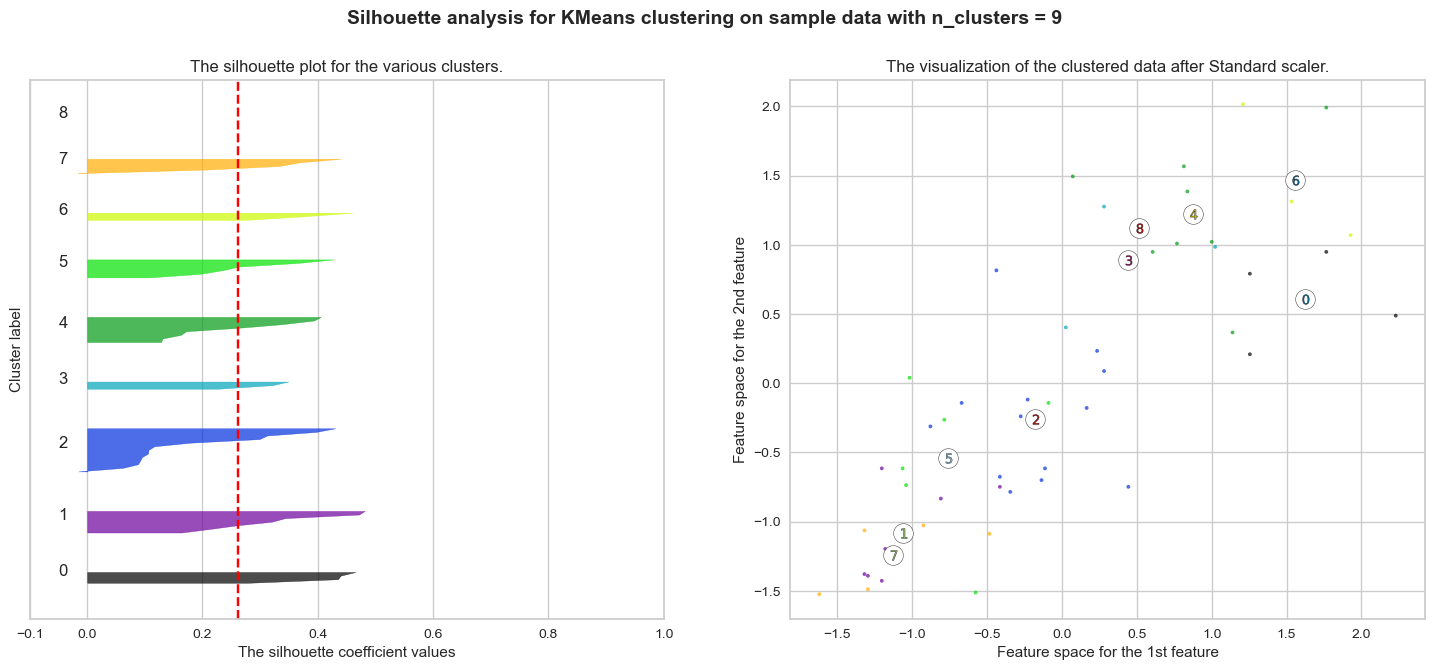

In [60]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [61]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [62]:
# these are nothing but cluster labels...

y_predict_kmeans

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [63]:
model_kmeans.labels_

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [64]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524]])

In [65]:
# within-cluster sum of squared
# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

80.08569526137276

In [66]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [67]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

Murder  Assault   UrbanPop      Rape
                   mean     mean       mean      mean
Kmeans_label                                         
0             12.165000  255.250  68.400000  29.16500
1              5.656250  138.875  73.875000  18.78125
2              3.971429   86.500  51.928571  12.70000

In [68]:
df[df['Kmeans_label']==0]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                       
Alabama           13.2      236        58  21.2             0
Alaska            10.0      263        48  44.5             0
Arizona            8.1      294        80  31.0             0
California         9.0      276        91  40.6             0
Colorado           7.9      204        78  38.7             0
Florida           15.4      335        80  31.9             0
Georgia           17.4      211        60  25.8             0
Illinois          10.4      249        83  24.0             0
Louisiana         15.4      249        66  22.2             0
Maryland          11.3      300        67  27.8             0
Michigan          12.1      255        74  35.1             0
Mississippi       16.1      259        44  17.1             0
Missouri           9.0      178        70  28.2             0
Nevada            12.2      252        81  46.0             0
New Mexico        11.4      285        70  32.1             0
New York          11.1      254        86  26.1             0
North Carolina    13.0      337        45  16.1             0
South Carolina    14.4      279        48  22.5             0
Tennessee         13.2      188        59  26.9             0
Texas             12.7      201        80  25.5             0

In [69]:
df[df['Kmeans_label']==1]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                      
Connecticut       3.3      110        77  11.1             1
Delaware          5.9      238        72  15.8             1
Hawaii            5.3       46        83  20.2             1
Indiana           7.2      113        65  21.0             1
Kansas            6.0      115        66  18.0             1
Massachusetts     4.4      149        85  16.3             1
New Jersey        7.4      159        89  18.8             1
Ohio              7.3      120        75  21.4             1
Oklahoma          6.6      151        68  20.0             1
Oregon            4.9      159        67  29.3             1
Pennsylvania      6.3      106        72  14.9             1
Rhode Island      3.4      174        87   8.3             1
Utah              3.2      120        80  22.9             1
Virginia          8.5      156        63  20.7             1
Washington        4.0      145        73  26.2             1
Wyoming           6.8      161        60  15.6             1

In [70]:
df[df['Kmeans_label']==2]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                      
Arkansas          8.8      190        50  19.5             2
Idaho             2.6      120        54  14.2             2
Iowa              2.2       56        57  11.3             2
Kentucky          9.7      109        52  16.3             2
Maine             2.1       83        51   7.8             2
Minnesota         2.7       72        66  14.9             2
Montana           6.0      109        53  16.4             2
Nebraska          4.3      102        62  16.5             2
New Hampshire     2.1       57        56   9.5             2
North Dakota      0.8       45        44   7.3             2
South Dakota      3.8       86        45  12.8             2
Vermont           2.2       48        32  11.2             2
West Virginia     5.7       81        39   9.3             2
Wisconsin         2.6       53        66  10.8             2

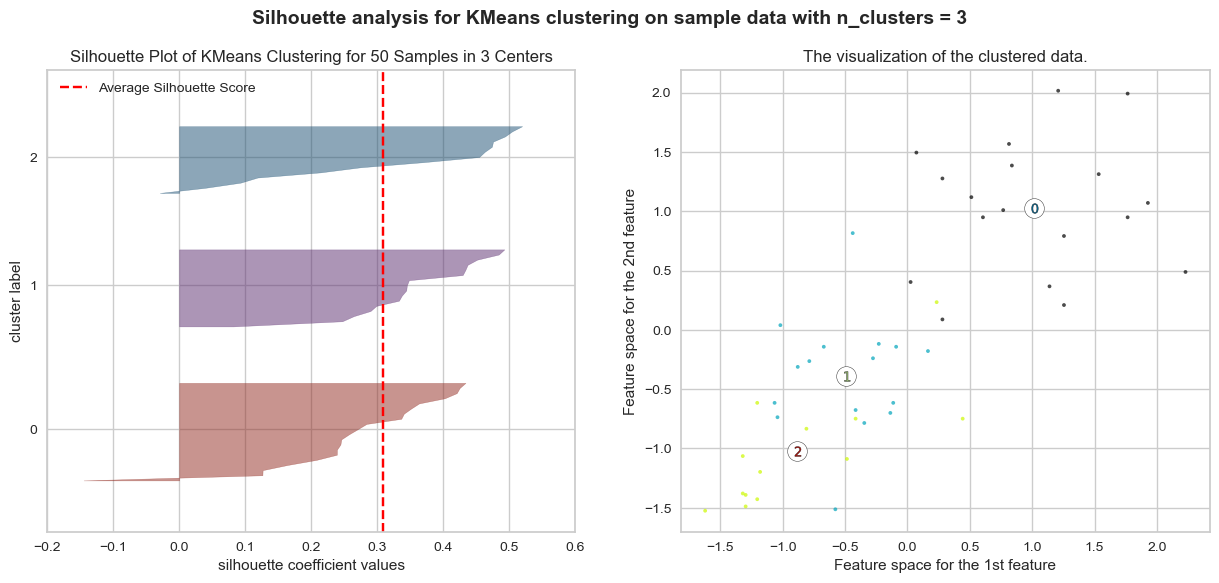

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_df[:, 0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

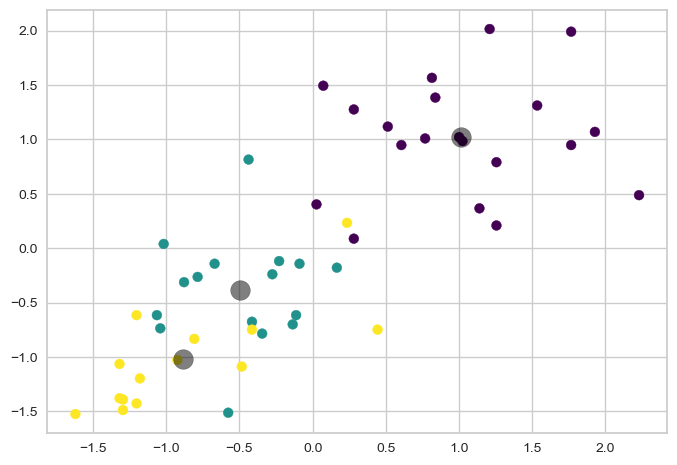

In [72]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [73]:
# Elbow Method and Silhouette Score on MinMaxScaler Applied Data
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0              1       13.184123
1              2        6.596894
2              3        5.010878
3              4        3.683456
4              5        3.185022
5              6        2.905611
6              7        2.597316
7              8        2.319778
8              9        2.109806
9             10        1.864203
10            11        1.681514
11            12        1.514333
12            13        1.408199
13            14        1.298793

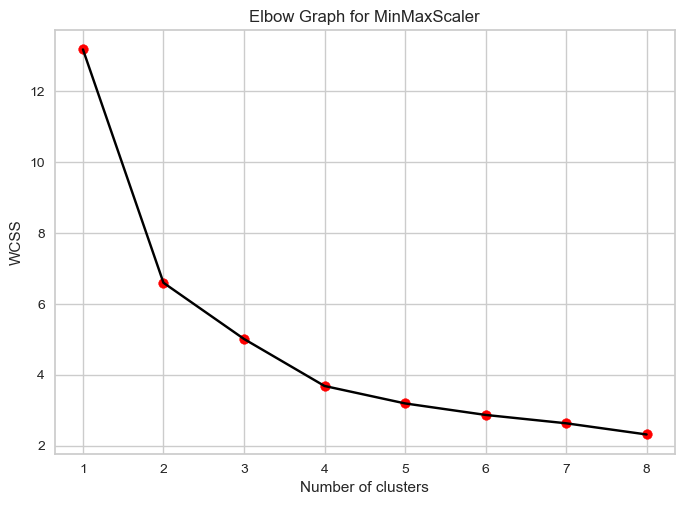

In [74]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for MinMaxScaler data


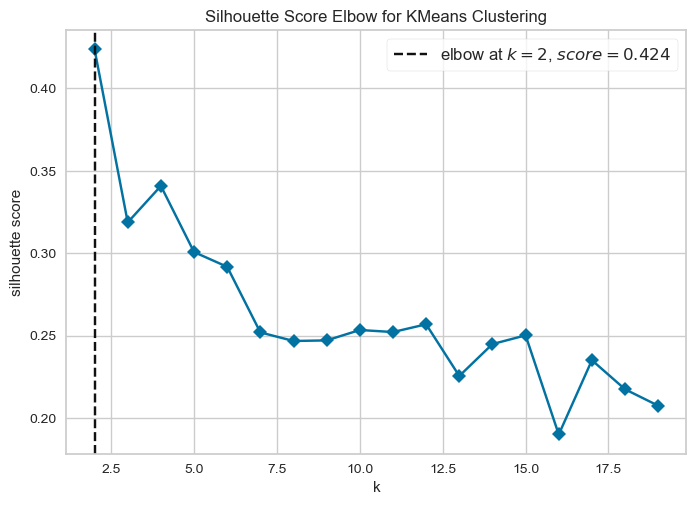

In [75]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [76]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.3018188352484066
For n_clusters = 6 The average silhouette_score is : 0.2774383012316109
For n_clusters = 7 The average silhouette_score is : 0.27068412384434465
For n_clusters = 8 The average silhouette_score is : 0.24577733094529056
For n_clusters = 9 The average silhouette_score is : 0.2574683104655026


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.30076261721222347
For n_clusters = 6 The average silhouette_score is : 0.2918285820526902
For n_clusters = 7 The average silhouette_score is : 0.2520461655275077
For n_clusters = 8 The average silhouette_score is : 0.2468420517258156
For n_clusters = 9 The average silhouette_score is : 0.24719031981372122


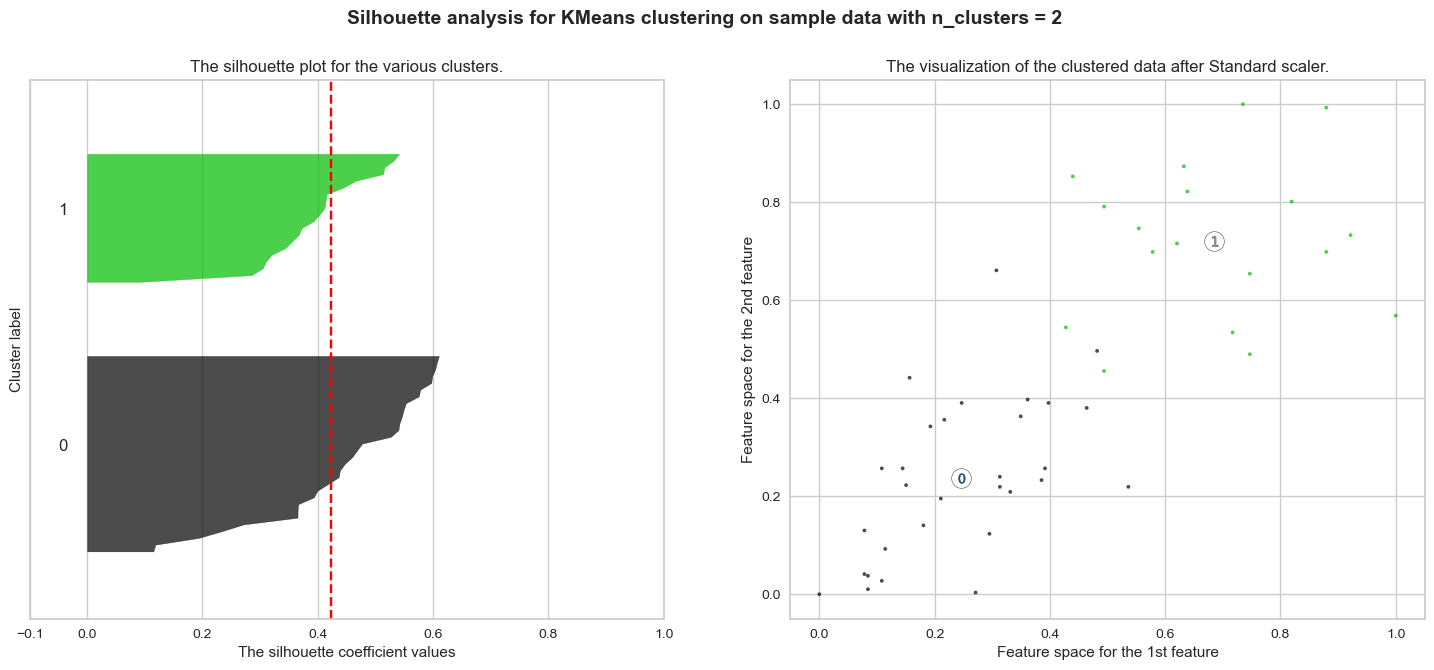

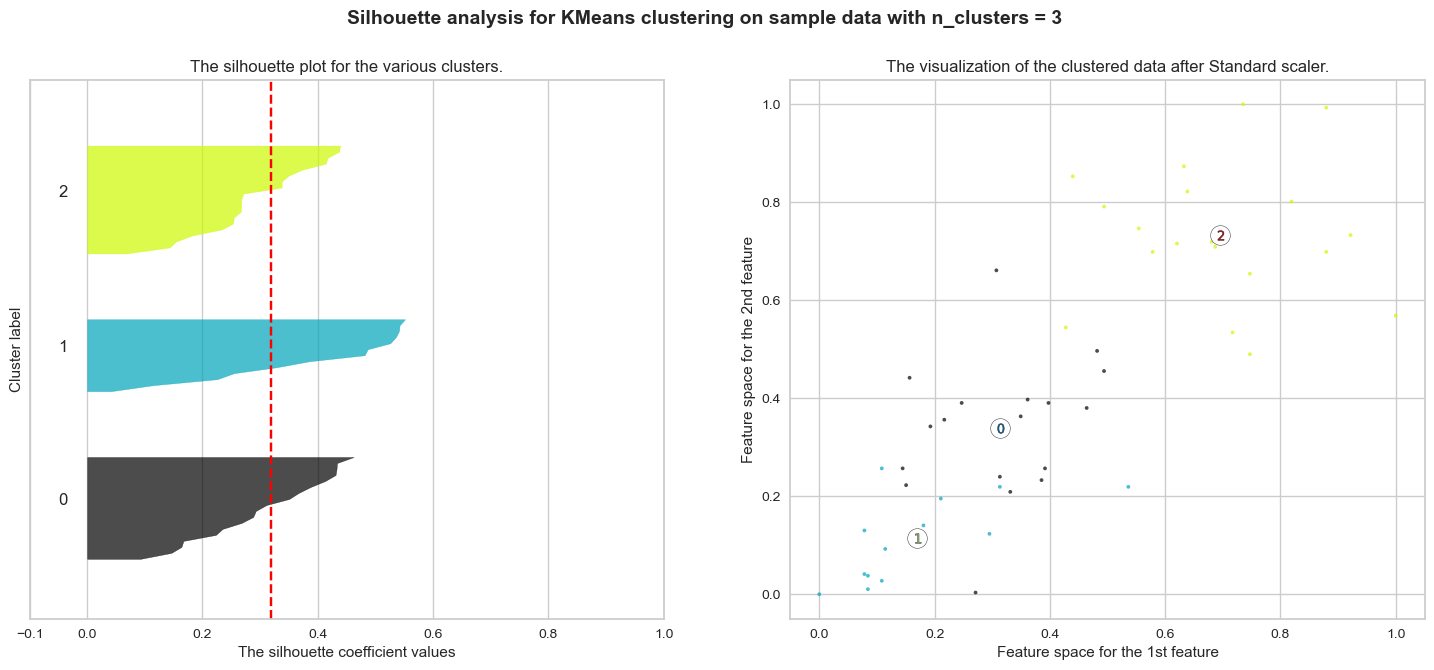

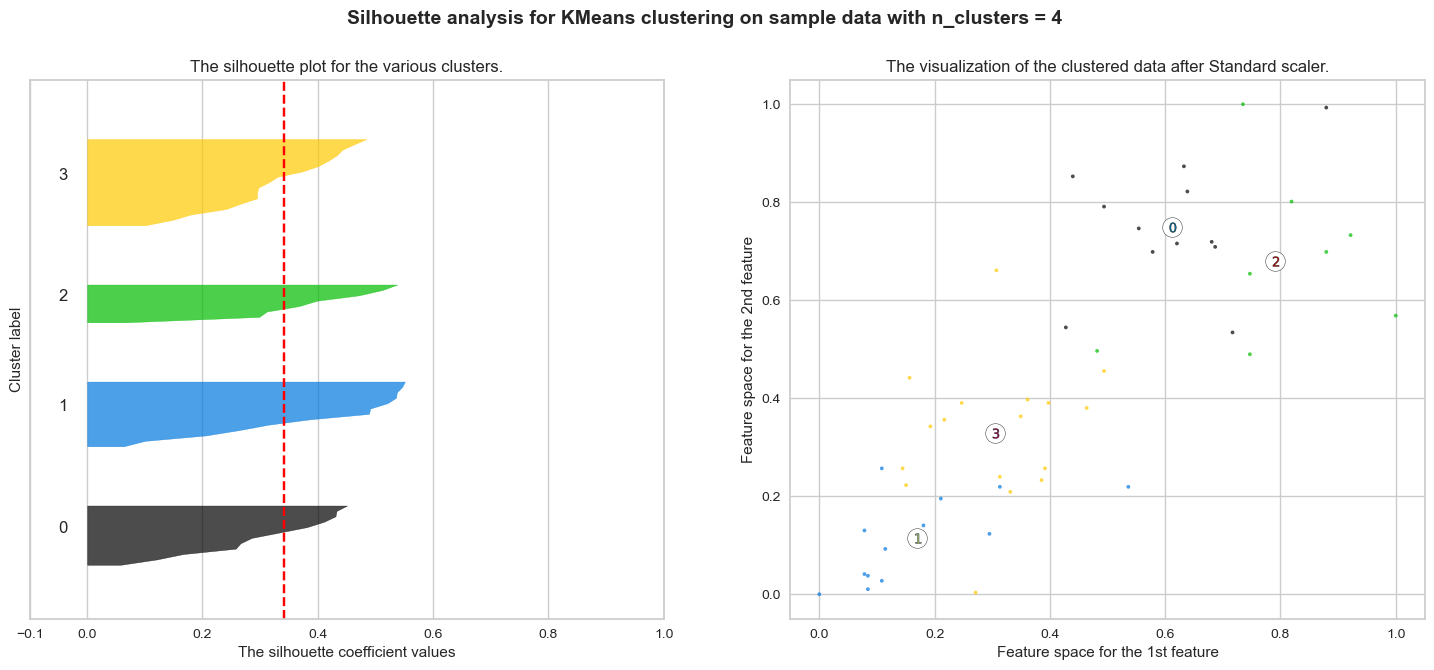

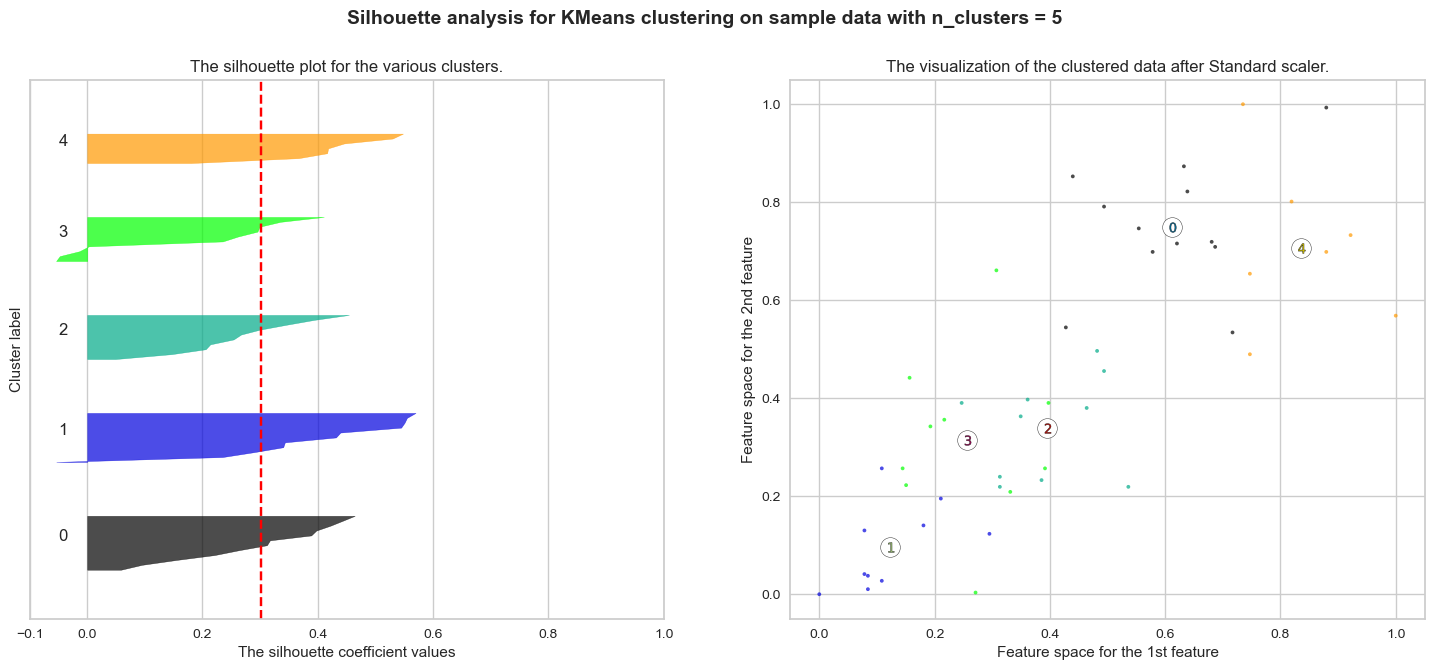

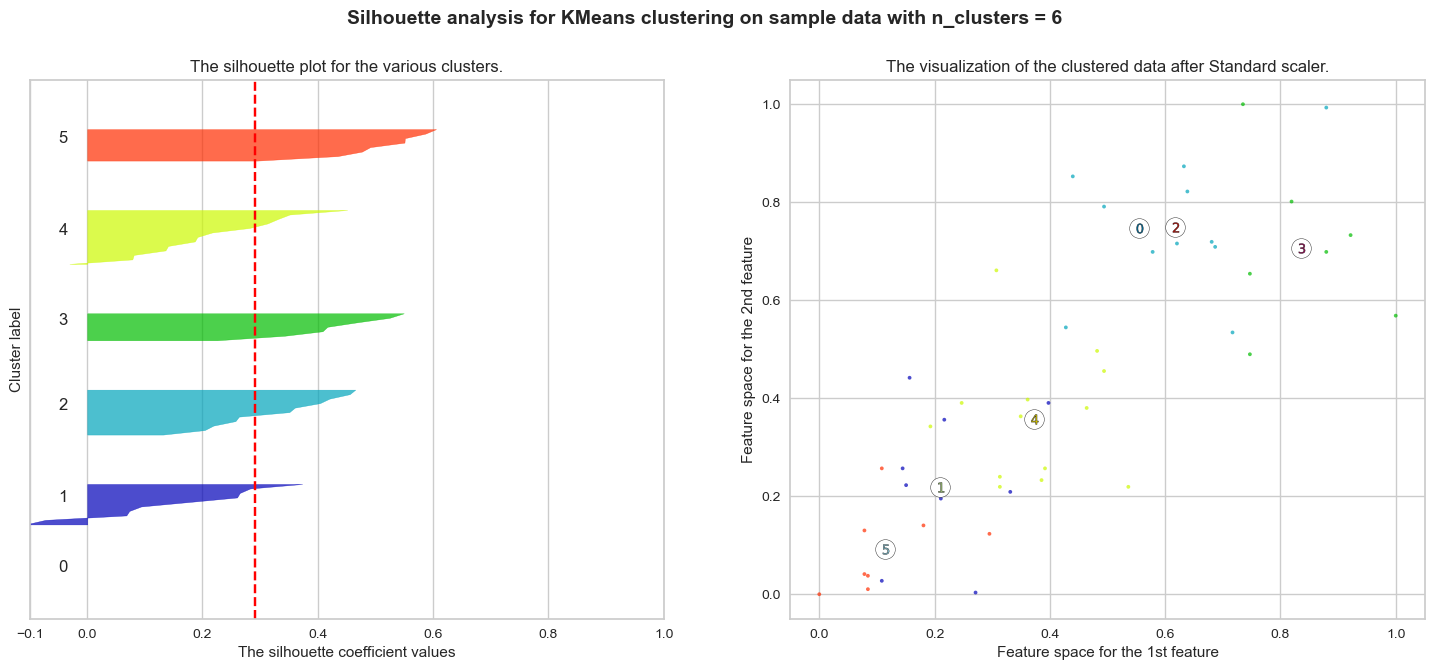

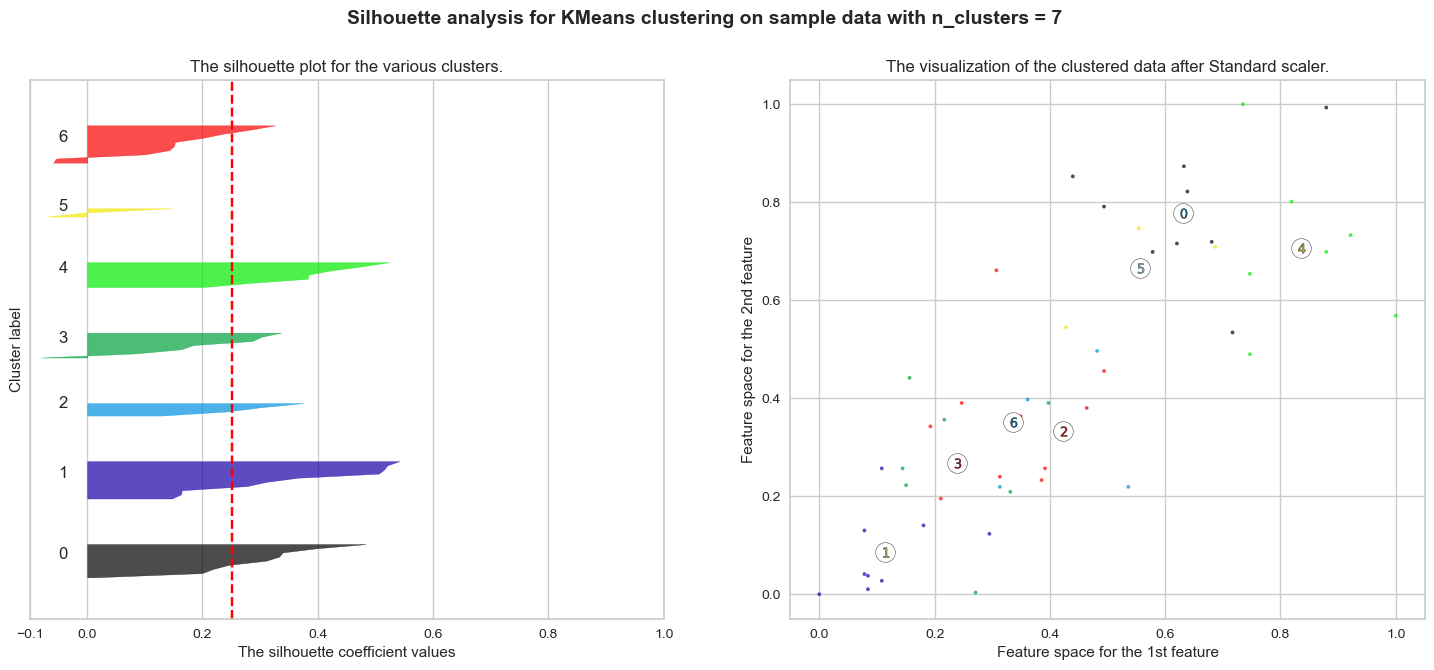

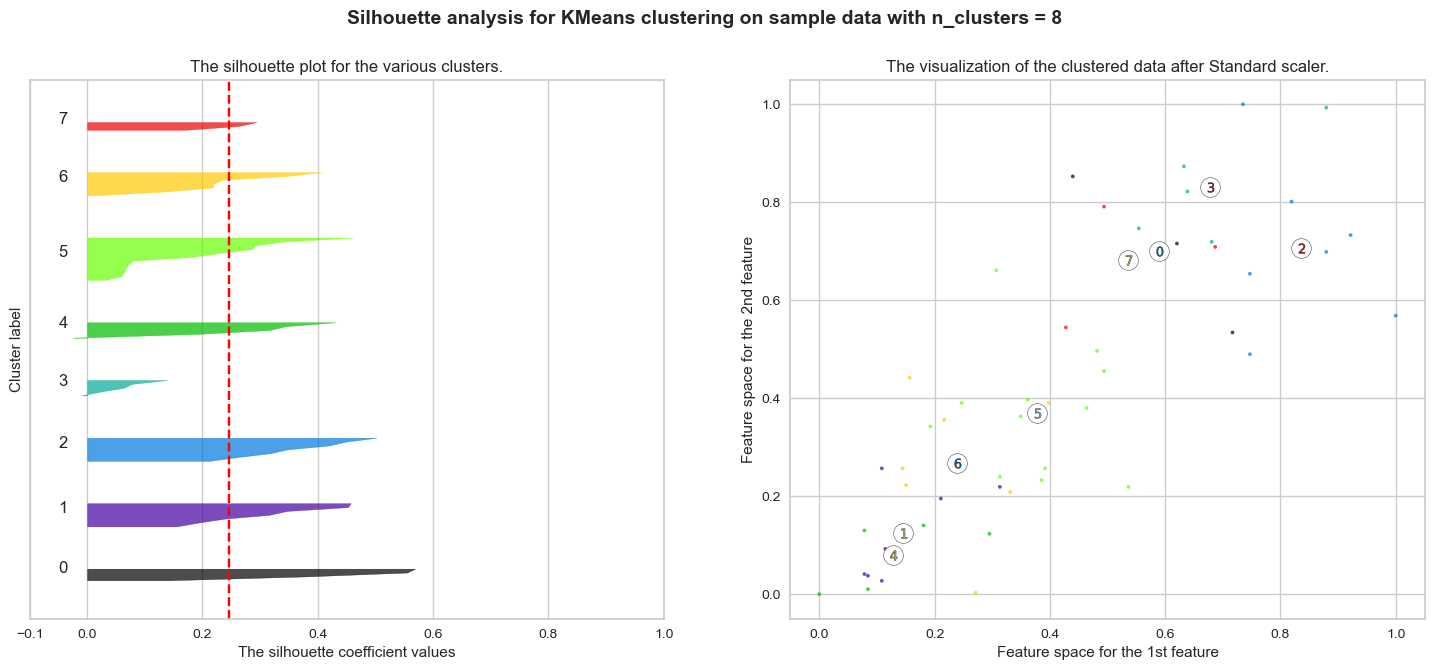

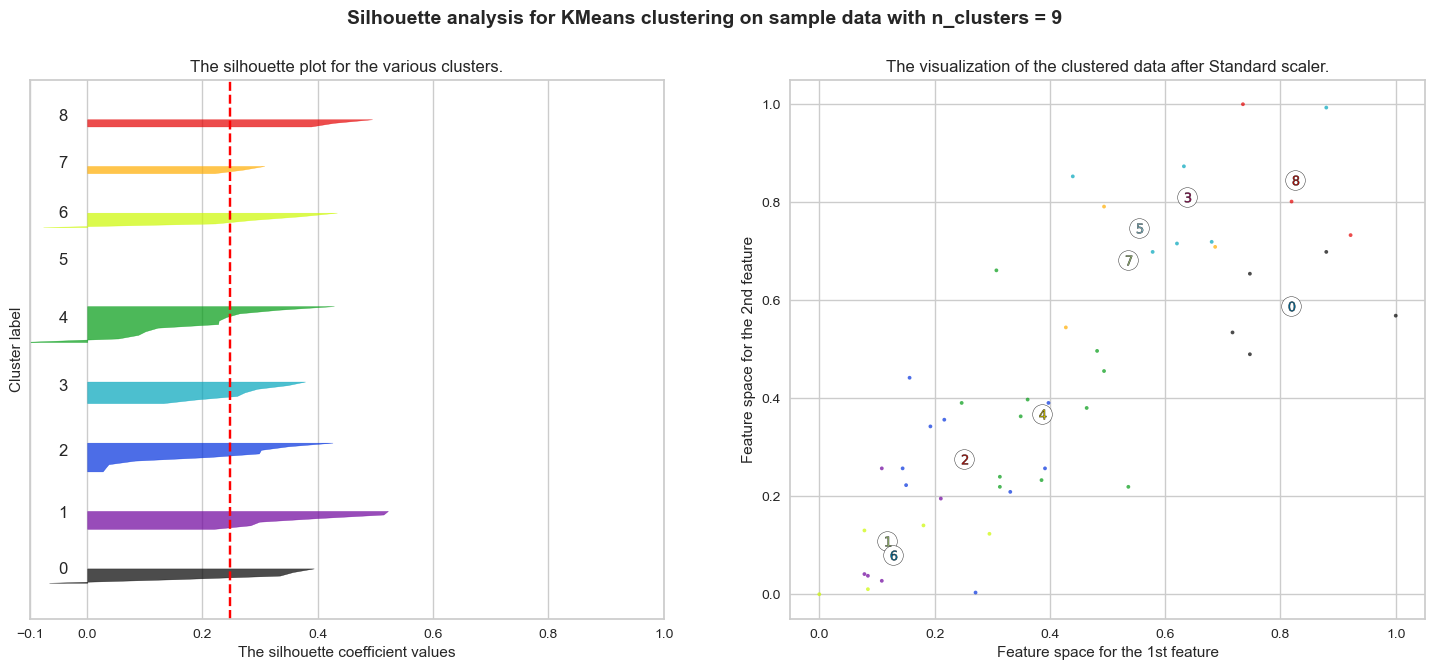

In [77]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,0], minmax_df[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [78]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [79]:
# these are nothing but cluster labels...

y_predict_kmeans

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [80]:
model_kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [81]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[0.68463855, 0.72003425, 0.61694915, 0.56498708],
       [0.24518072, 0.23778539, 0.53615819, 0.22334195]])

In [82]:
# within-cluster sum of squared
# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

6.596893867946196

In [83]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

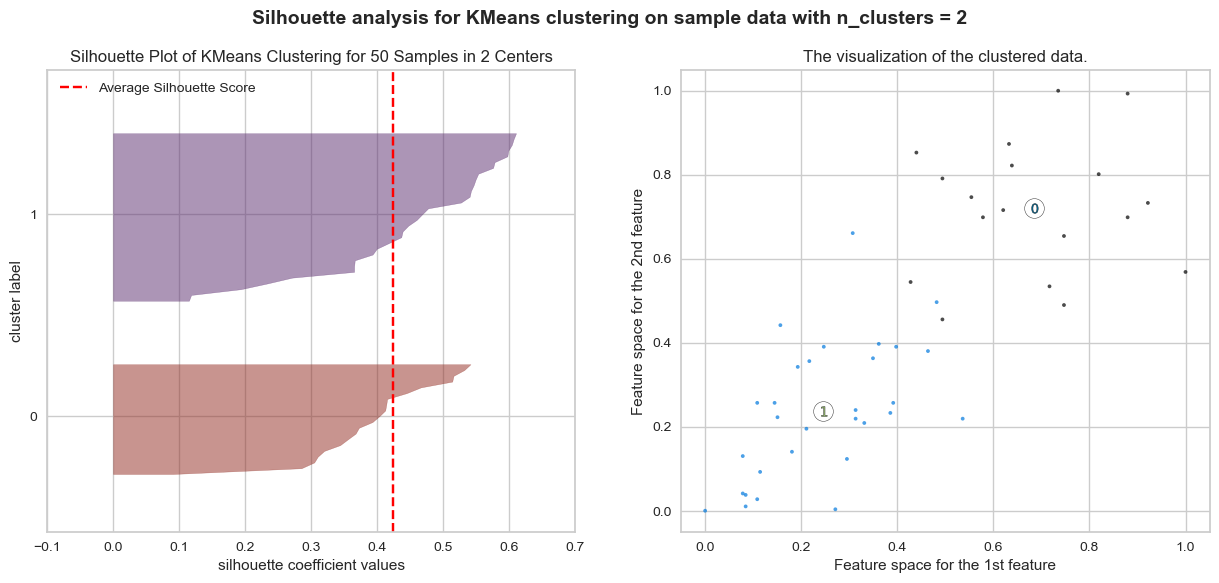

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

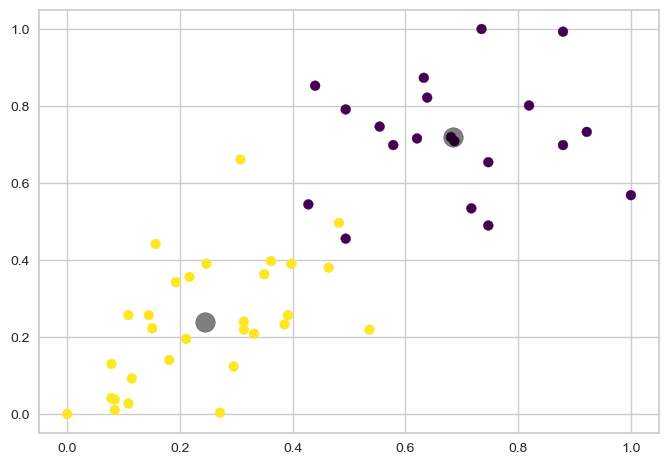

In [85]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [86]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                mean        mean       mean       mean
Kmeans_label                                          
0             12.165  255.250000  68.400000  29.165000
1              4.870  114.433333  63.633333  15.943333

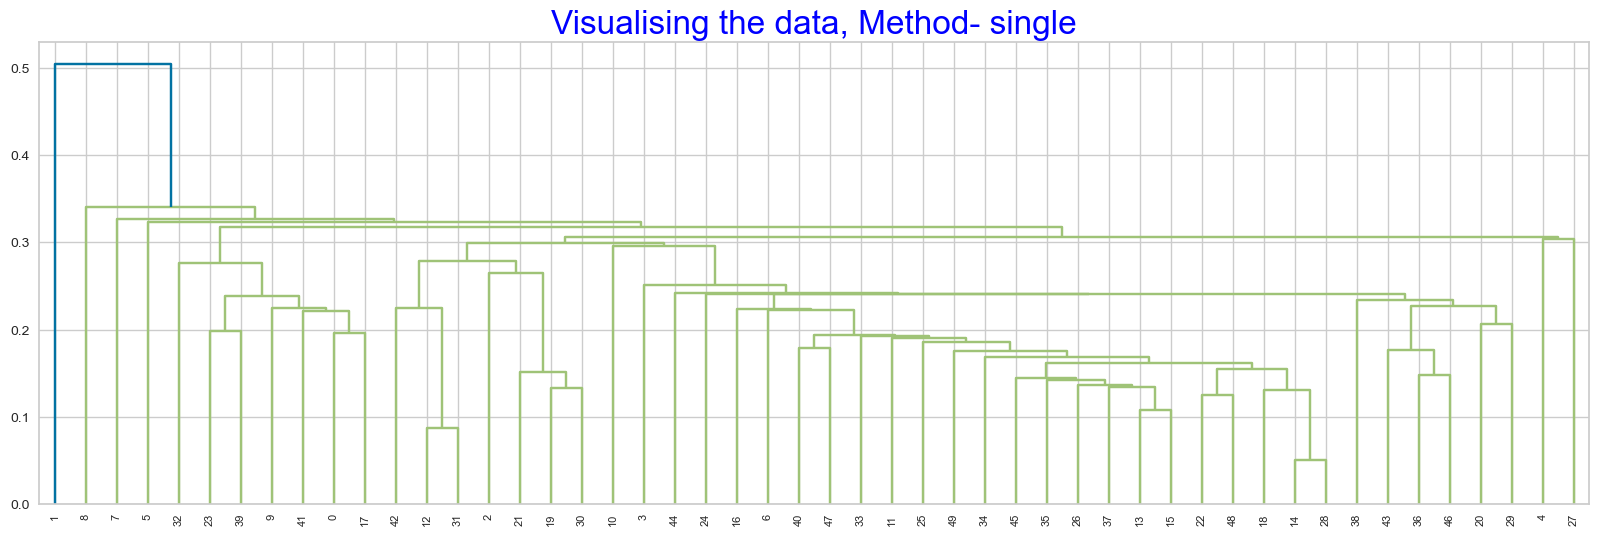

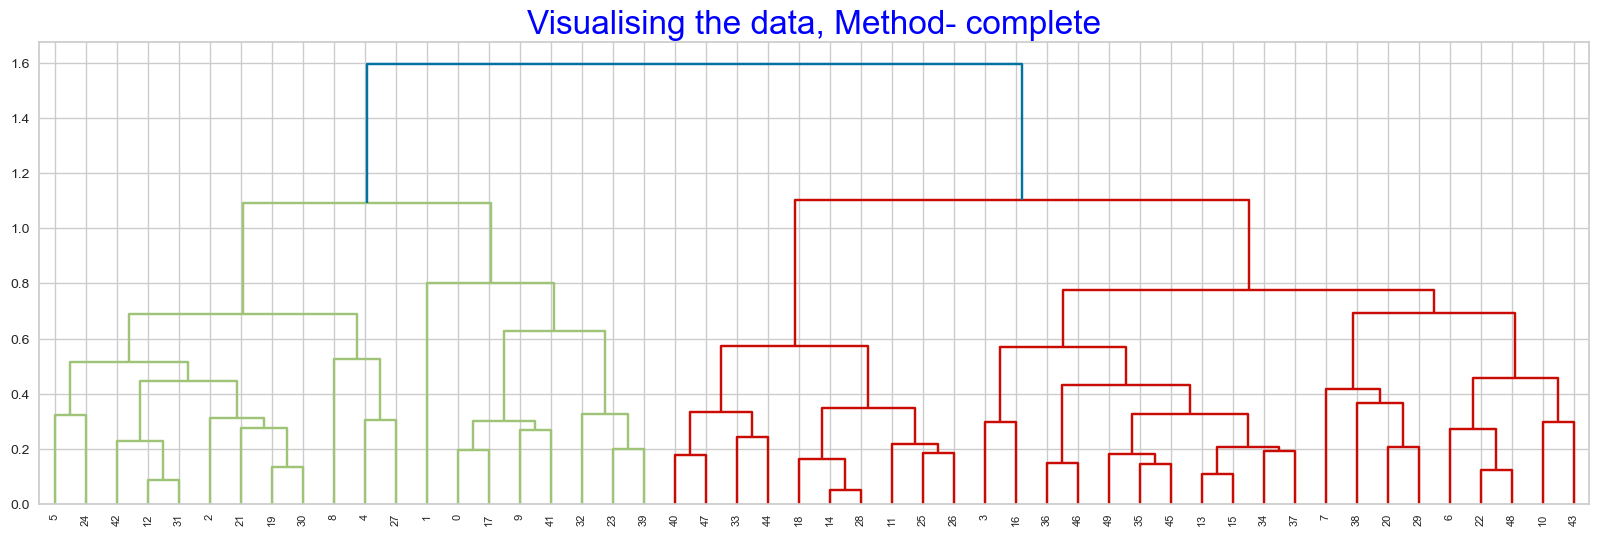

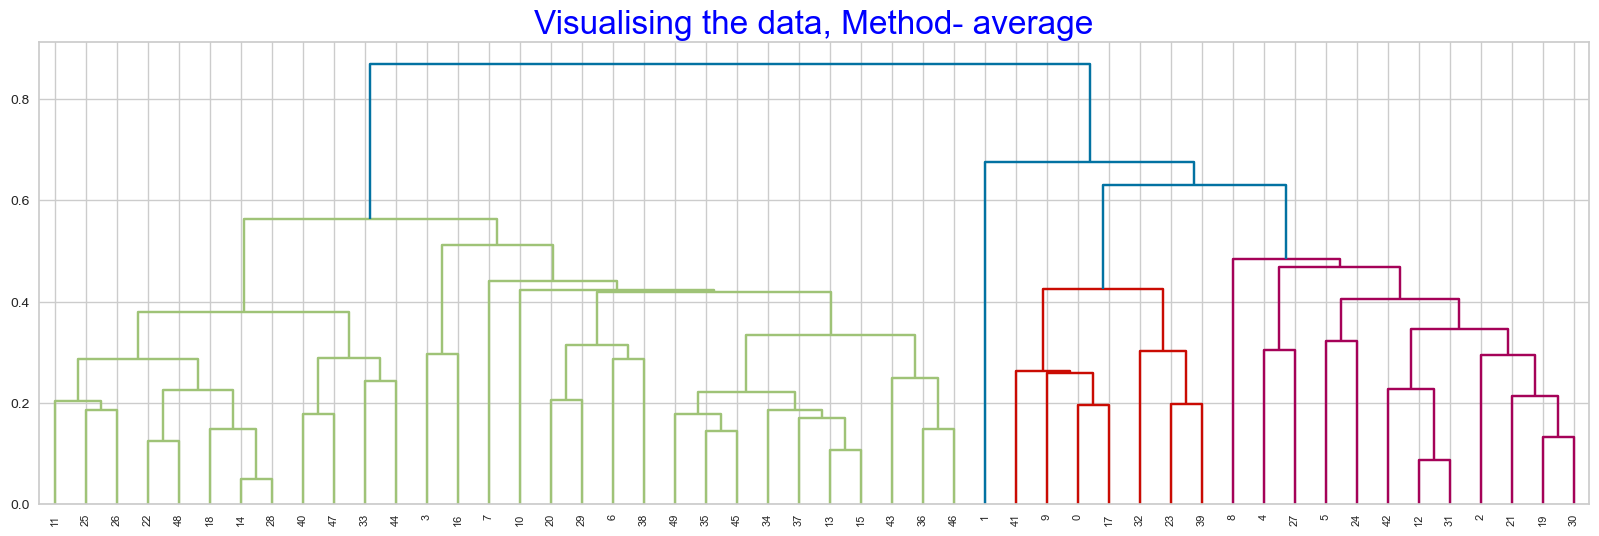

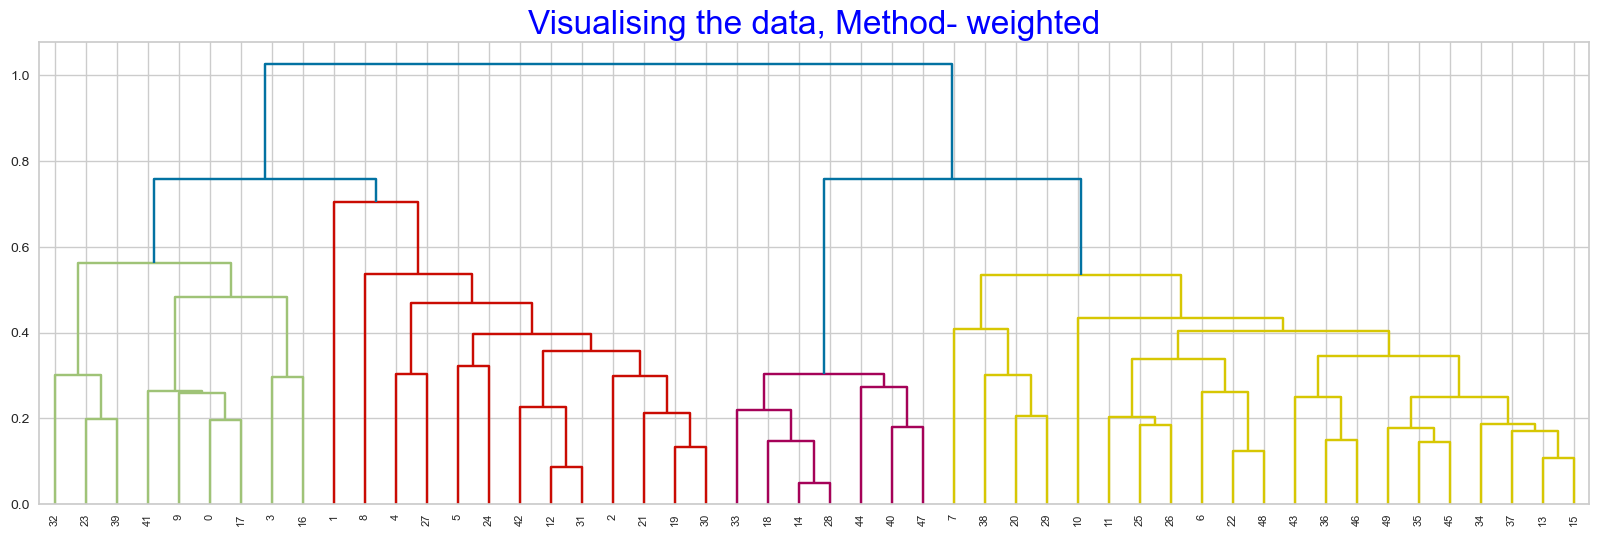

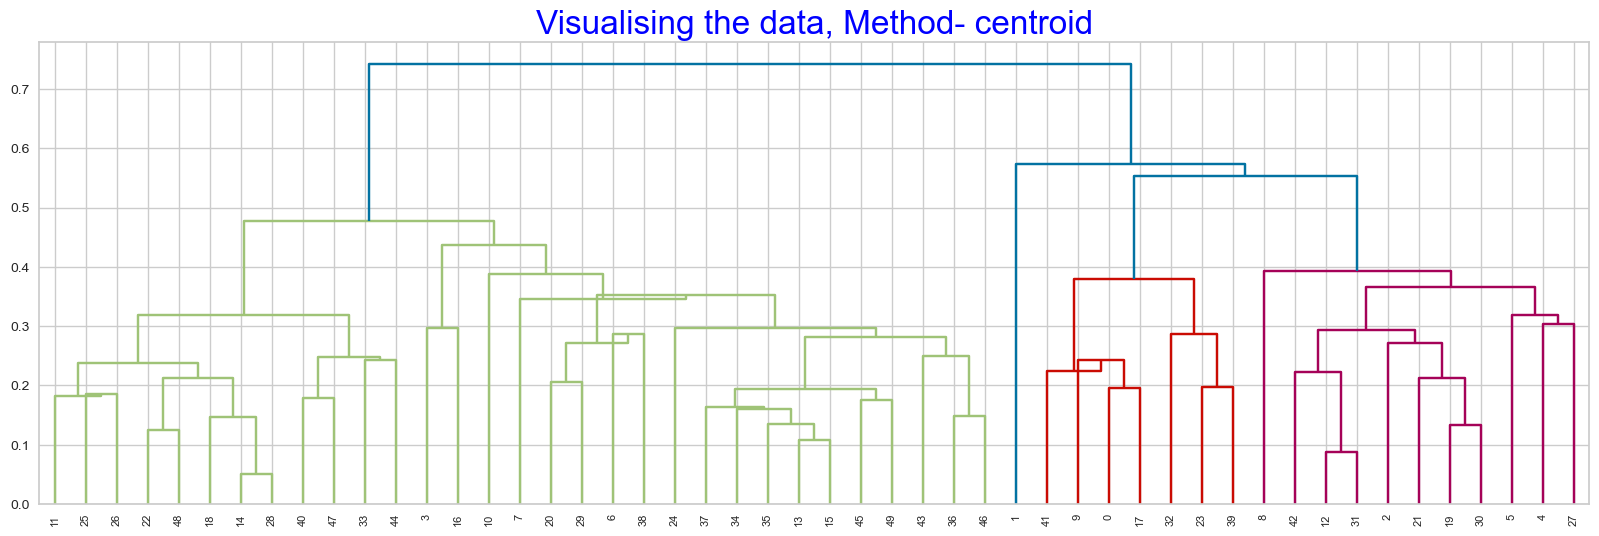

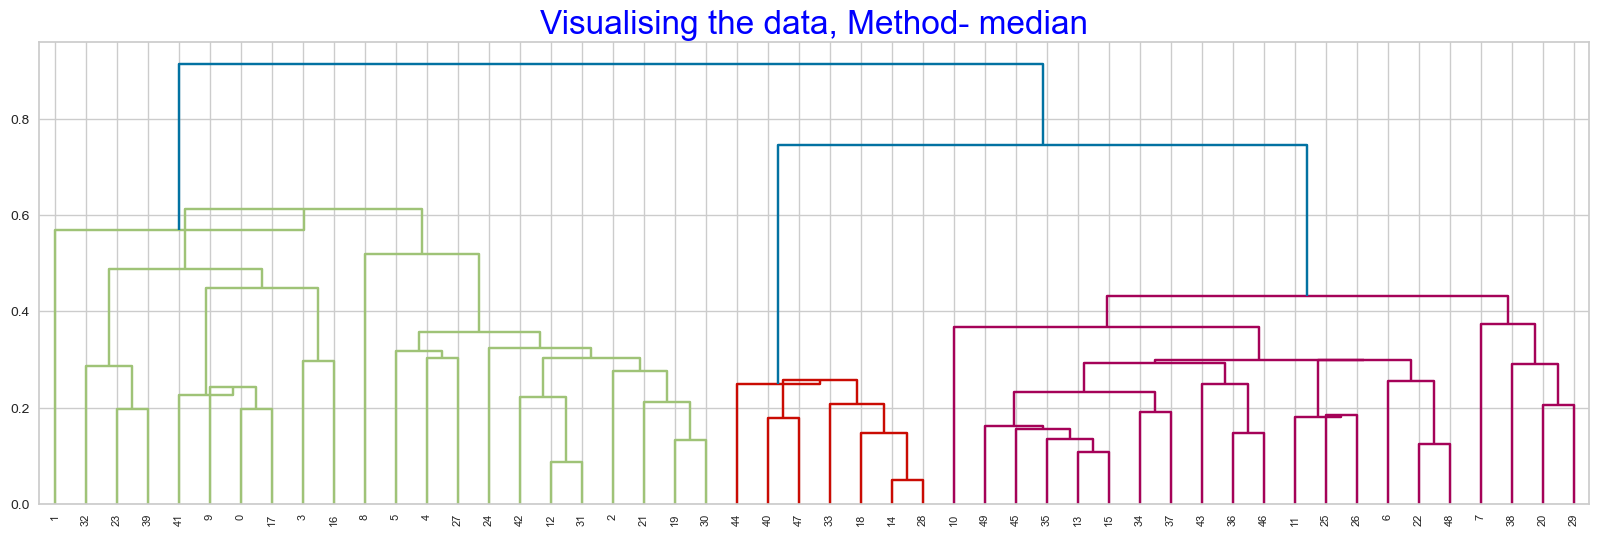

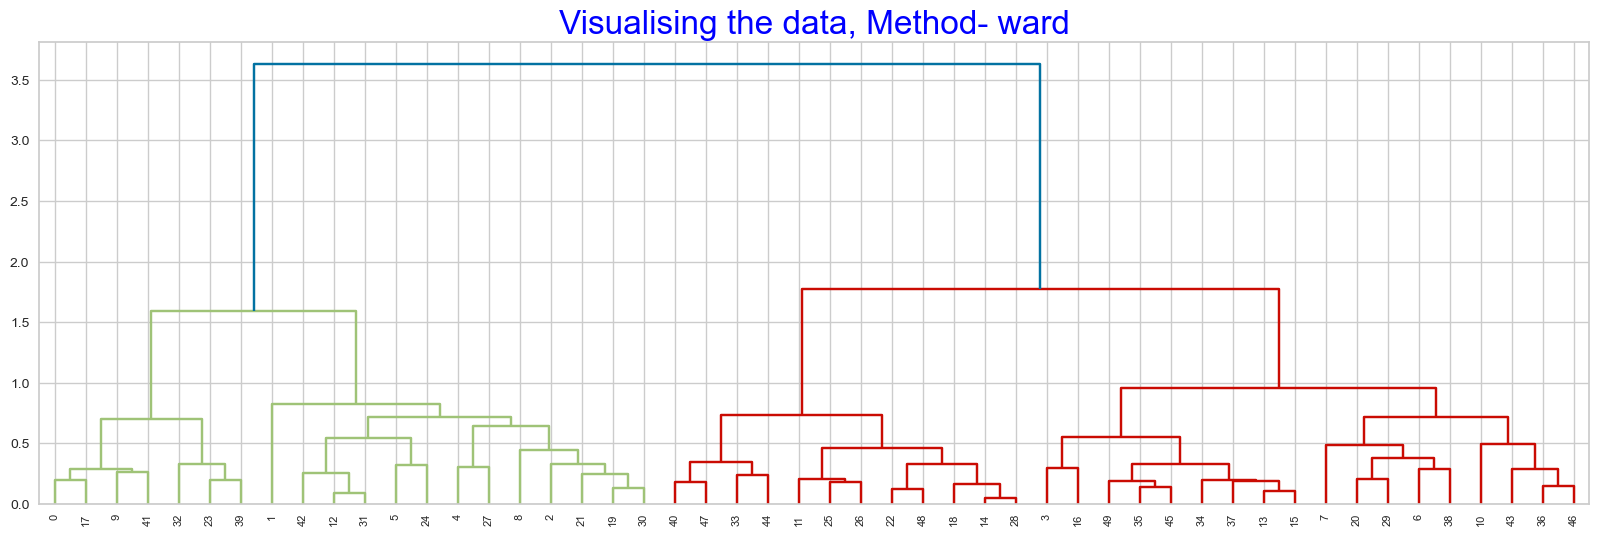

In [87]:
# Dendogram on MinMaxScaler Applied on Dataset
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [88]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

In [89]:
# Dendrogram on Standard Scaler Applied on Data
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

In [90]:
# Run Hierarchical Clustering.(Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [91]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [92]:
# Clustering Score
(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

In [93]:
# Putting Cluster lables into original dataset And analysis of the same
# Concating Labels with main dataset copy
df['Hierarchical_labels'] = agg_clustering.labels_

In [94]:
df.groupby('Hierarchical_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label
                       mean        mean       mean       mean         mean
Hierarchical_labels                                                       
0                     4.870  114.433333  63.633333  15.943333          1.0
1                    12.165  255.250000  68.400000  29.165000          0.0

<Axes: xlabel='Hierarchical_labels', ylabel='Murder'>

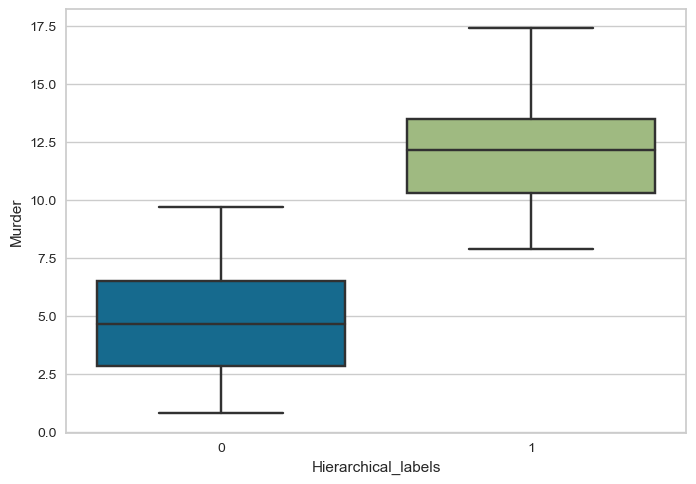

In [95]:
plt.figure
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Assault'>

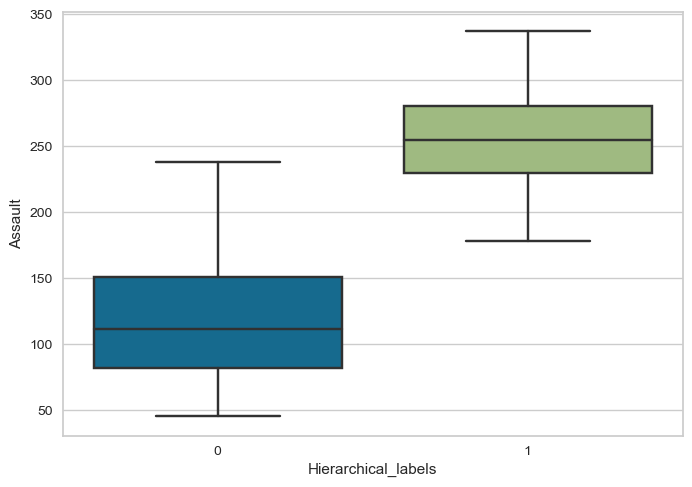

In [96]:
plt.figure
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Rape'>

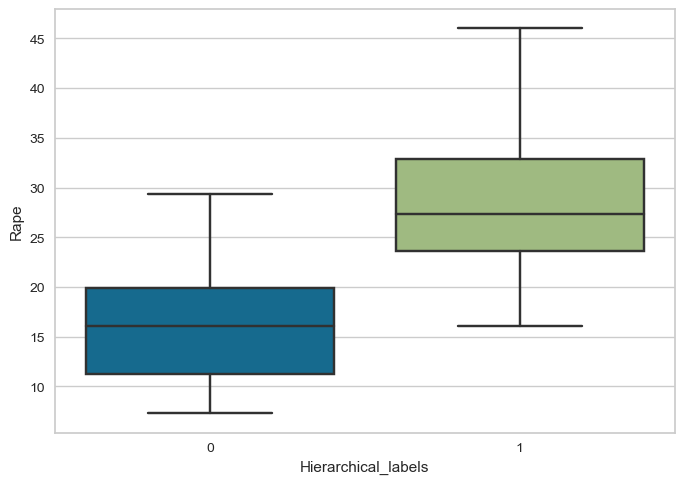

In [97]:
plt.figure
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df)

In [98]:
# DBSCAN of Standard Scaled Data
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [99]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


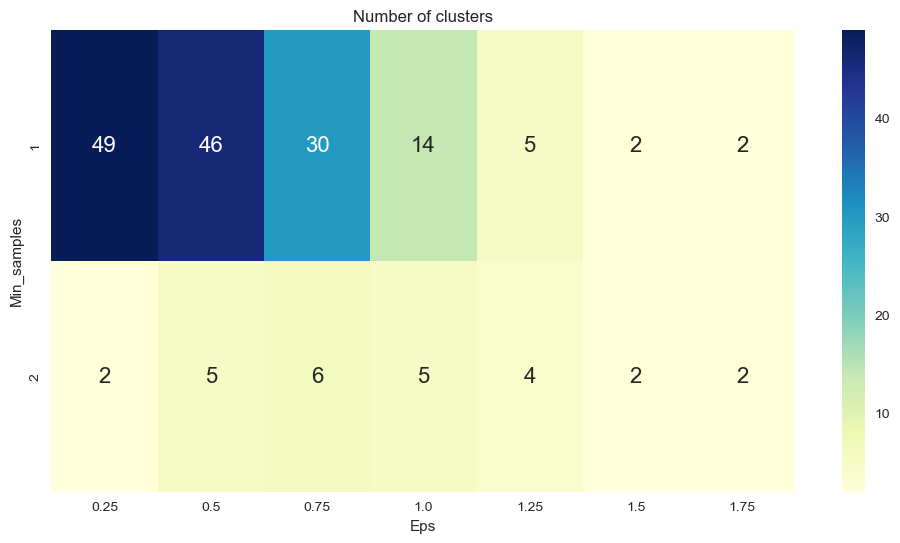

In [100]:
# Collecting number of generated clusters.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

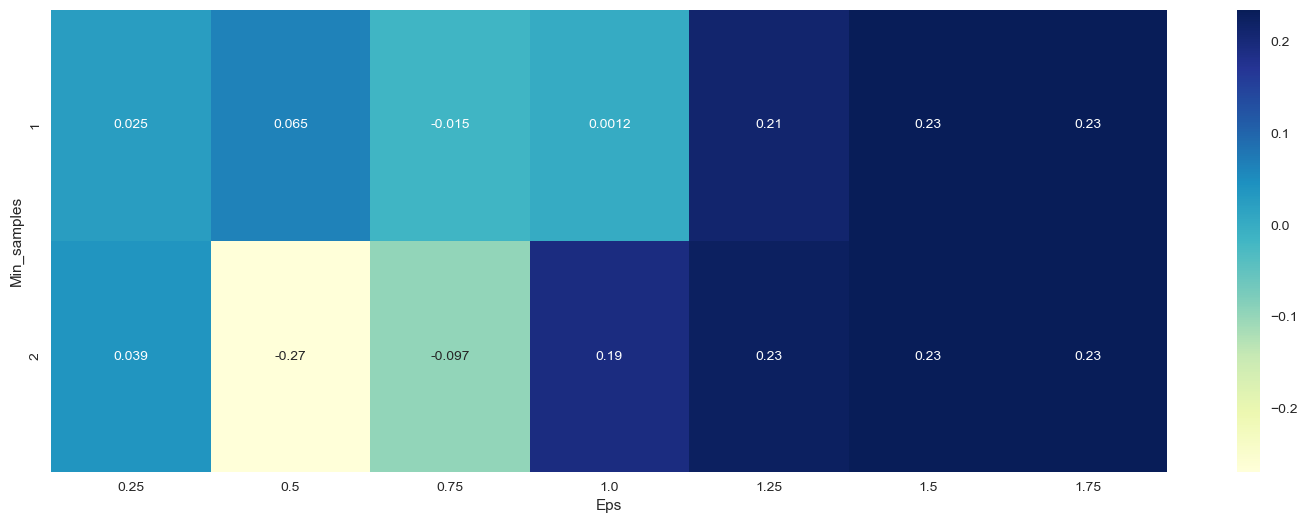

In [101]:
# As the heatplot above shows, the number of clusters vary from 49 to 2.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [102]:
# Global maximum is 0.23 for eps=1.25 and min_samples=2
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [103]:
# Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [104]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [105]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  \
States                                                      
Alabama       13.2      236        58  21.2             0   
Alaska        10.0      263        48  44.5             0   
Arizona        8.1      294        80  31.0             0   
Arkansas       8.8      190        50  19.5             1   
California     9.0      276        91  40.6             0   

            Hierarchical_labels  DBSCAN_labels  
States                                          
Alabama                       1              0  
Alaska                        1              1  
Arizona                       1              0  
Arkansas                      0              0  
California                    1              0

In [106]:
df.groupby('DBSCAN_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0               7.742857  168.877551  65.897959  20.757143     0.612245   
1              10.000000  263.000000  48.000000  44.500000     0.000000   

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
0                        0.387755  
1                        1.000000

In [107]:
# Silhouette Score for DBSCAN
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


In [108]:
# DBSCAN on MinMax Scaled Data
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [109]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


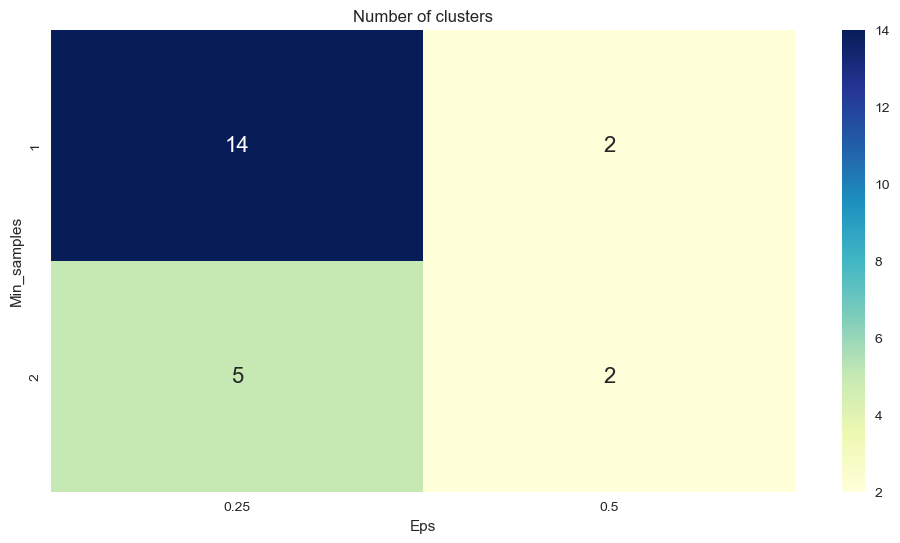

In [110]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

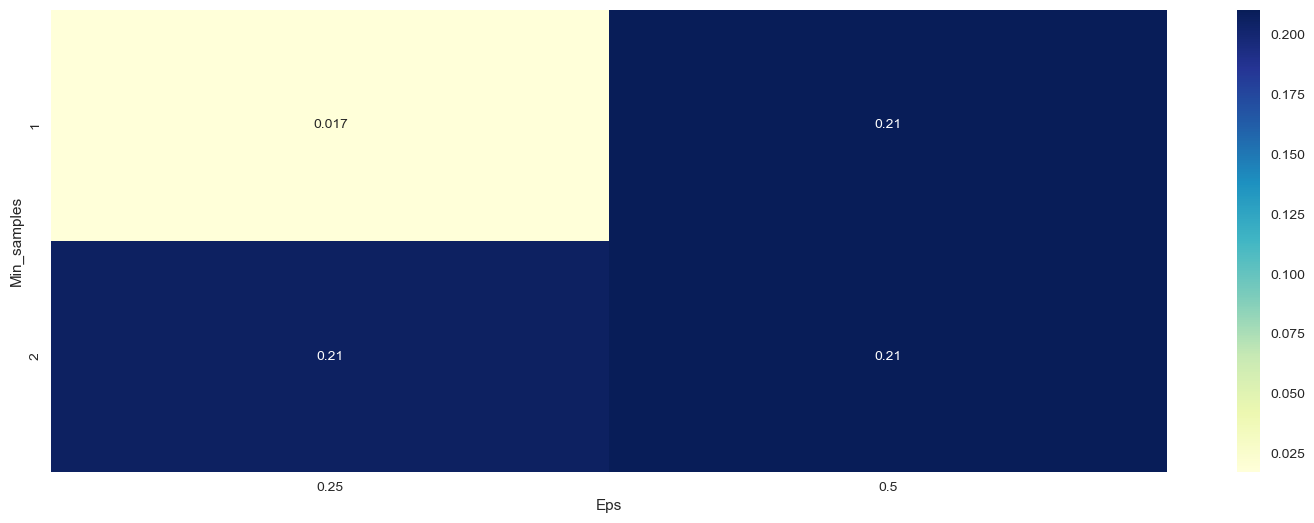

In [111]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [112]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [113]:
# Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [114]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [115]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  \
States                                                      
Alabama       13.2      236        58  21.2             0   
Alaska        10.0      263        48  44.5             0   
Arizona        8.1      294        80  31.0             0   
Arkansas       8.8      190        50  19.5             1   
California     9.0      276        91  40.6             0   

            Hierarchical_labels  DBSCAN_labels  
States                                          
Alabama                       1              0  
Alaska                        1              1  
Arizona                       1              0  
Arkansas                      0              0  
California                    1              0

In [116]:
df.groupby('DBSCAN_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0               7.742857  168.877551  65.897959  20.757143     0.612245   
1              10.000000  263.000000  48.000000  44.500000     0.000000   

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
0                        0.387755  
1                        1.000000

In [117]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [118]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
Murder                   7.742857          10.0
Assault                168.877551         263.0
UrbanPop                65.897959          48.0
Rape                    20.757143          44.5
Kmeans_label             0.612245           0.0
Hierarchical_labels      0.387755           1.0
DBSCAN_labels            0.000000           1.0

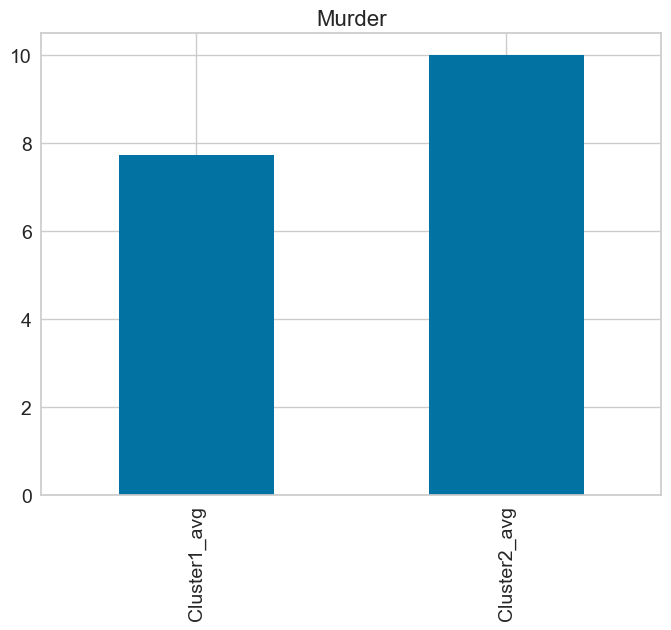

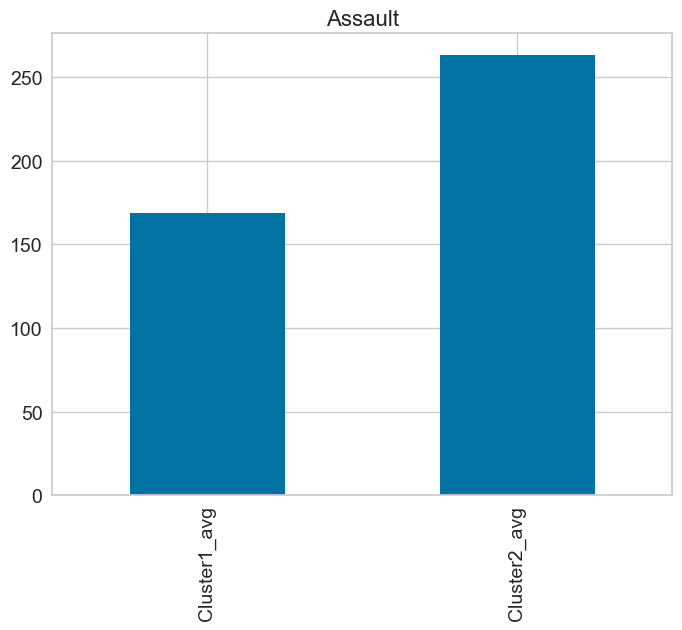

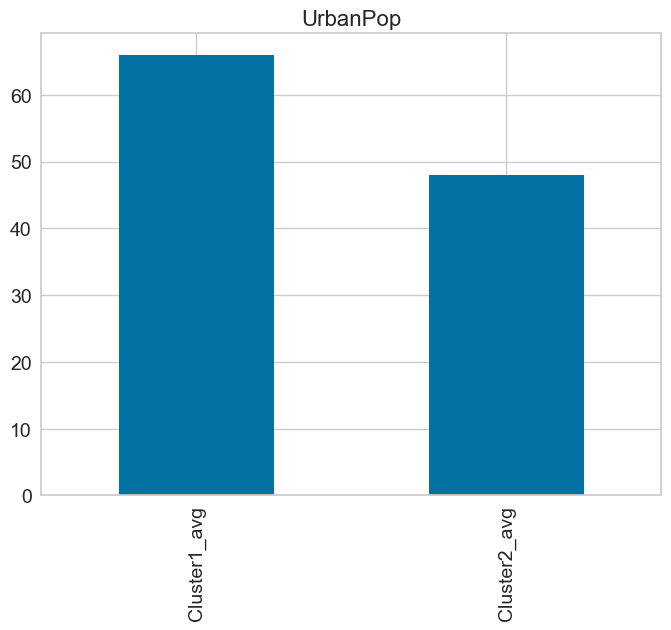

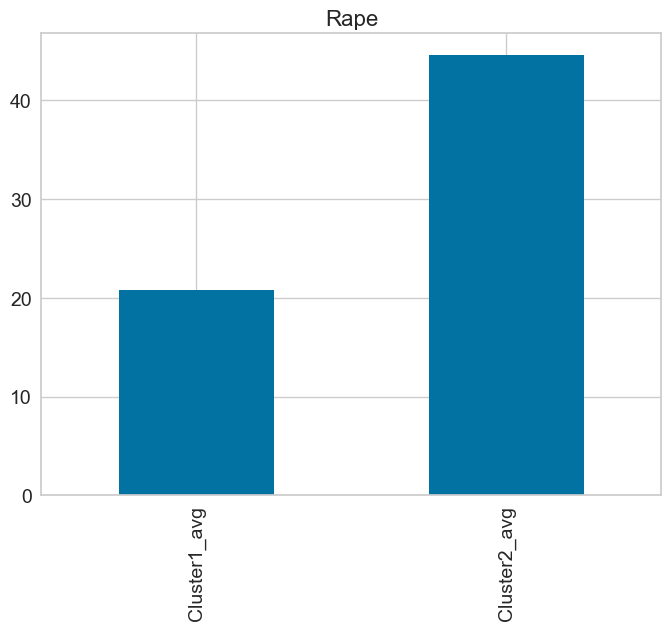

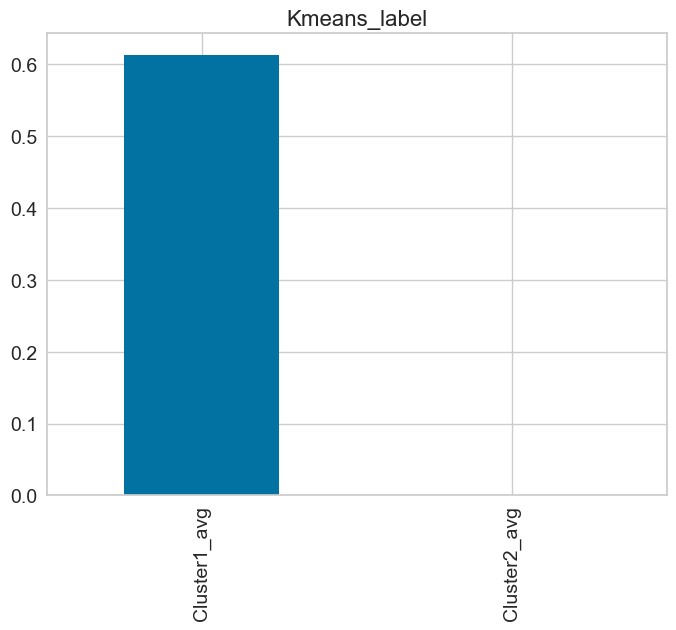

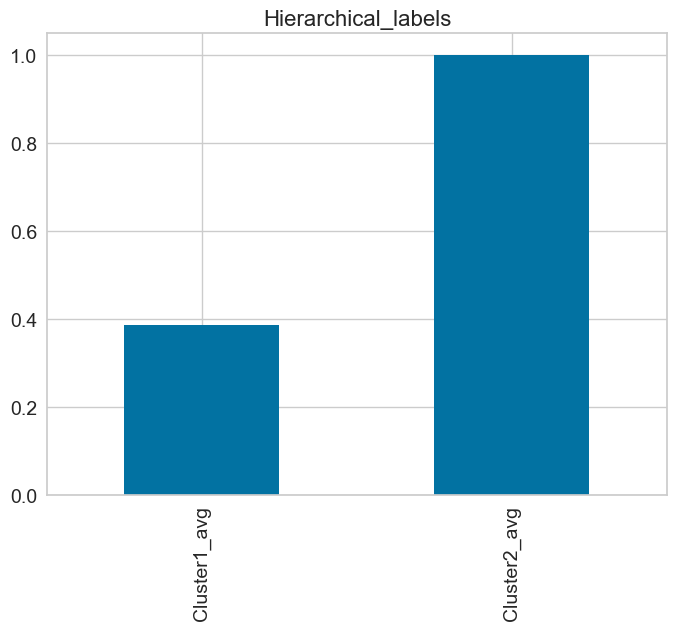

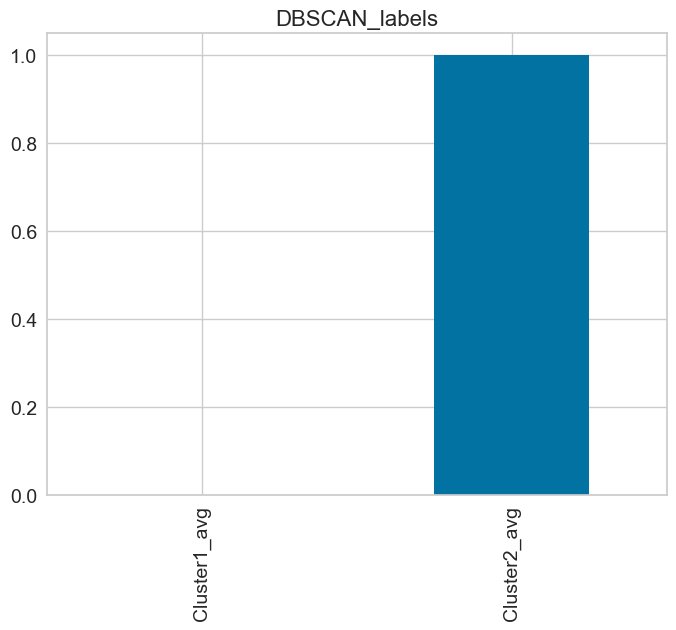

In [119]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()